# HYUNDAYI ANALYSIS

## WEB SCRAPING

In [185]:
# import the libraries
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [187]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Amulakh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [189]:
# get the website - SUV
website = 'https://www.cars24.com/buy-used-hyundai-cars/'
request = requests.get(website)
print(request)

<Response [200]>


Request accepted

In [192]:
# creating a BS instance
soup = BeautifulSoup(request.content, 'html.parser')

In [194]:
# for all the cars
cars = soup.find_all('div', class_='_2YB7p')

In [196]:
"""
Function to obtain the Car Model Year, Car Brand and Car Model
"""
def car_model_details(car):
    car_model = car.find('h3', class_='_11dVb')
    model_details = word_tokenize(car_model.text)
    model_year = model_details[0]
    brand = model_details[1]
    model_list = model_details[2:]
    model = ' '.join(model_list)
    return model_year, brand, model

In [198]:
"""
Function to obtain the Kilometers Travelled, Fuel Type and Transmission Type
"""
def car_features(car):
    lst = []

    for item in car.find_all('li'):
        lst.append(item.text)

    kms = lst[0].replace('km', '').strip().replace(',', '') # removing 'km' and the trailing space
    fuel = lst[2]
    transmission = lst[4]

    return kms, fuel, transmission

In [200]:
"""
Function to obtain the Actual Price, Discount Price, Current Price and EMI per month
"""
def pricing_details(car):
    def extract_price(text, pattern):
        match = re.search(pattern, text)
        if match:
            return float(match.group(1).replace(',', ''))
        return None

    try:
        # Actual Price
        actual_element = car.find('span', class_='_30QQ7')
        if actual_element:
            actual = actual_element.text
            actual_price = extract_price(actual, r'₹(\d+\.?\d*) Lakh')
            if actual_price is not None:
                actual_price = round(actual_price * 100000, 2)
            else:
                actual_price = 0
        else:
            actual_price = 0

        # Discount Price
        discount_element = car.find('span', class_='YWP1x')
        if discount_element:
            discount = discount_element.text
            discount_price = extract_price(discount, r'\((\d+\.?\d*)k off\)')
            if discount_price is not None:
                discount_price *= 1000
            else:
                discount_price = 0
        else:
            discount_price = 0

        # Current Price
        current_element = car.find('strong', class_='_3RL-I')
        if current_element:
            current = current_element.text
            current_price = extract_price(current, r'₹(\d+\.?\d*) Lakh')
            if current_price is not None:
                current_price = round(current_price * 100000, 2)
            else:
                current_price = 0
        else:
            current_price = 0

        # EMI Plan per Month
        emi_element = car.find('span', class_='_2O0yU')
        if emi_element:
            emi = emi_element.text
            emi_plan_per_month = extract_price(emi, r'₹([\d,]+)/month')
            if emi_plan_per_month is None:
                emi_plan_per_month = 0
        else:
            emi_plan_per_month = 0

        return actual_price, discount_price, current_price, emi_plan_per_month

    except:
        return 0, 0, 0, 0

In [202]:
"""
Function to obtain the Details regarding Test Drive such as Test Drive Location and Day
"""
def test_drive_details(car):
    test = []
    out = car.find('span', class_ = '_1MKmC')
    if out is None:
        for item in car.find('p', class_ = '_3dGMY'):
            test.append(item.text)
        test_drive_day = test[1]
        test_drive_location = test[5]
        return test_drive_day, test_drive_location

    else:
        return 'Currently Tokened', 'NA'

In [204]:
# Collecting the Data
data = []
for car in cars:
    model_year, brand, model = car_model_details(car)
    kms, fuel_type, transmission = car_features(car)
    special_feature = car.find('span', class_ = '_3JoYA').text
    actual_price, discount, current_price, emi_plan_per_month = pricing_details(car)
    test_drive_day, test_drive_location = test_drive_details(car)
    data.append([model_year, brand, model, kms, fuel_type, transmission, special_feature, actual_price, discount, current_price, emi_plan_per_month, test_drive_day, test_drive_location])

df = pd.DataFrame(data, columns=['Model Year', 'Brand', 'Model', 'Kilometers', 'Fuel Type', 'Transmission', 'Special Feature', 'Actual Price', 'Discount', 'Current Price', 'EMI per month', 'Test Drive Day', 'Test Drive Location'])

In [206]:
cars24_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Model Year           420 non-null    object 
 1   Brand                420 non-null    object 
 2   Model                420 non-null    object 
 3   Kilometers           420 non-null    object 
 4   Fuel Type            420 non-null    object 
 5   Transmission         420 non-null    object 
 6   Special Feature      420 non-null    object 
 7   Actual Price         420 non-null    float64
 8   Discount             420 non-null    float64
 9   Current Price        420 non-null    float64
 10  EMI per month        420 non-null    float64
 11  Test Drive Day       420 non-null    object 
 12  Test Drive Location  420 non-null    object 
dtypes: float64(4), object(9)
memory usage: 42.8+ KB


In [208]:
# save the file to csv format
cars24_df.to_csv('cars24_data.csv', index=False)

## Hyundayi Data Cleaning and Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = r"C:\Users\ABHI MANE\Downloads\Evo Ven Project E\cars24_data.csv"
df = pd.read_csv(file_path)

In [3]:
df.head(10)

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2014,Hyundai,i10 MAGNA 1.1,46502,Petrol,Manual,Reg. serviced,333000.0,43250.0,290000.0,6445.0,Today,"Undri, Pune"
1,2015,Hyundai,Verna FLUIDIC 4S 1.6 VTVT S ( O ),87421,Petrol,Manual,Alloy wheels,618000.0,55000.0,563000.0,11007.0,Today,"Undri, Pune"
2,2014,Hyundai,Xcent SX 1.2 ( O ),89598,Petrol,Manual,Top Model,385000.0,28000.0,357000.0,7941.0,Today,"Undri, Pune"
3,2016,Hyundai,i10 SPORTZ 1.1,45505,Petrol,Manual,City driven,415000.0,30300.0,385000.0,7521.0,Today,"Attapur, Hyderabad"
4,2014,Hyundai,Xcent S 1.2,55106,Petrol,Manual,100% tyre life,403000.0,35660.0,367000.0,8171.0,Today,"Mulund West, Mumbai \n"
5,2017,Hyundai,Creta SX PLUS AT 1.6 PETROL,98493,Petrol,Automatic,Top Model,973000.0,19000.0,954000.0,18159.0,Today,"Whitefield Main Road, Bhoruka Tech Park, Benga..."
6,2016,Hyundai,Elite i20 ASTA 1.2 ( O ),27261,Petrol,Manual,Top Model,598000.0,77000.0,521000.0,10186.0,Today,"Goregaon, Mumbai"
7,2017,Hyundai,Creta SX PLUS 1.6 PETROL,47231,Petrol,Manual,Top Model,1002000.0,44450.0,958000.0,18226.0,Today,"Attapur, Hyderabad"
8,2013,Hyundai,i20 SPORTZ 1.2,27927,Petrol,Manual,Alloy wheels,432000.0,56310.0,376000.0,9893.0,Today,"Tathawade, Pune"
9,2015,Hyundai,Elite i20 SPORTZ 1.2,86015,Petrol,Manual,Safety specs.,558000.0,89320.0,469000.0,9163.0,Today,"Tathawade, Pune"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Model Year           420 non-null    int64  
 1   Brand                420 non-null    object 
 2   Model                420 non-null    object 
 3   Kilometers           420 non-null    int64  
 4   Fuel Type            420 non-null    object 
 5   Transmission         420 non-null    object 
 6   Special Feature      420 non-null    object 
 7   Actual Price         420 non-null    float64
 8   Discount             420 non-null    float64
 9   Current Price        420 non-null    float64
 10  EMI per month        420 non-null    float64
 11  Test Drive Day       420 non-null    object 
 12  Test Drive Location  420 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 42.8+ KB


In [5]:
df.isnull().sum()

Model Year             0
Brand                  0
Model                  0
Kilometers             0
Fuel Type              0
Transmission           0
Special Feature        0
Actual Price           0
Discount               0
Current Price          0
EMI per month          0
Test Drive Day         0
Test Drive Location    0
dtype: int64

In [6]:
df.describe()

,Model Year,Kilometers,Actual Price,Discount,Current Price,EMI per month
count,420.000000,420.000000,4.200000e+02,420.000000,4.200000e+02,420.000000
mean,2016.700000,54225.900000,6.190500e+05,43717.500000,6.520500e+05,12820.850000
std,2.195787,21881.486423,2.939537e+05,24911.813344,2.489746e+05,4373.716063
min,2013.000000,27261.000000,0.000000e+00,0.000000,2.900000e+05,6445.000000
25%,2015.000000,40821.000000,4.120000e+05,29725.000000,3.840000e+05,8915.000000
50%,2016.500000,46003.500000,6.530000e+05,39625.000000,6.370000e+05,12453.000000
75%,2018.250000,64890.250000,8.737500e+05,58045.000000,8.397500e+05,15983.500000
max,2021.000000,98493.000000,1.002000e+06,91000.000000,1.152000e+06,21927.000000


In [7]:
print(df.columns)

Index(['Model Year', 'Brand', 'Model', 'Kilometers', 'Fuel Type',
       'Transmission', 'Special Feature', 'Actual Price', 'Discount',
       'Current Price', 'EMI per month', 'Test Drive Day',
       'Test Drive Location'],
      dtype='object')


In [8]:
print(df[['Brand', 'Model']].head(20))

      Brand                               Model
0   Hyundai                       i10 MAGNA 1.1
1   Hyundai   Verna FLUIDIC 4S 1.6 VTVT S ( O )
2   Hyundai                  Xcent SX 1.2 ( O )
3   Hyundai                      i10 SPORTZ 1.1
4   Hyundai                         Xcent S 1.2
5   Hyundai         Creta SX PLUS AT 1.6 PETROL
6   Hyundai            Elite i20 ASTA 1.2 ( O )
7   Hyundai            Creta SX PLUS 1.6 PETROL
8   Hyundai                      i20 SPORTZ 1.2
9   Hyundai                Elite i20 SPORTZ 1.2
10  Hyundai                   Verna 1.6 VTVT SX
11  Hyundai                 Creta SX 1.6 DIESEL
12  Hyundai                  VENUE SX 1.0 TURBO
13  Hyundai  GRAND I10 NIOS ASTA 1.2 KAPPA VTVT
14  Hyundai         Creta SX PLUS AT 1.6 PETROL
15  Hyundai                         VENUE S 1.2
16  Hyundai                  Eon ERA PLUS ( O )
17  Hyundai            Elite i20 ASTA 1.2 ( O )
18  Hyundai                 Creta SX 1.6 DIESEL
19  Hyundai         Creta SX PLUS AT 1.6

In [9]:
# Count the number of unique models in Dataset
unique_models_count = df['Model'].nunique()
print(f'Total number of unique models: {unique_models_count}')

Total number of unique models: 16


In [10]:
# Count the frequency of each model appears 
model_counts = df['Model'].value_counts()

print('Frequency of each model:')
print(model_counts)

Frequency of each model:
Model
Creta SX PLUS AT 1.6 PETROL           63
Elite i20 ASTA 1.2 ( O )              42
Creta SX 1.6 DIESEL                   42
i10 MAGNA 1.1                         21
Verna FLUIDIC 4S 1.6 VTVT S ( O )     21
Xcent SX 1.2 ( O )                    21
i10 SPORTZ 1.1                        21
Xcent S 1.2                           21
Creta SX PLUS 1.6 PETROL              21
i20 SPORTZ 1.2                        21
Elite i20 SPORTZ 1.2                  21
Verna 1.6 VTVT SX                     21
VENUE SX 1.0 TURBO                    21
GRAND I10 NIOS ASTA 1.2 KAPPA VTVT    21
VENUE S 1.2                           21
Eon ERA PLUS ( O )                    21
Name: count, dtype: int64


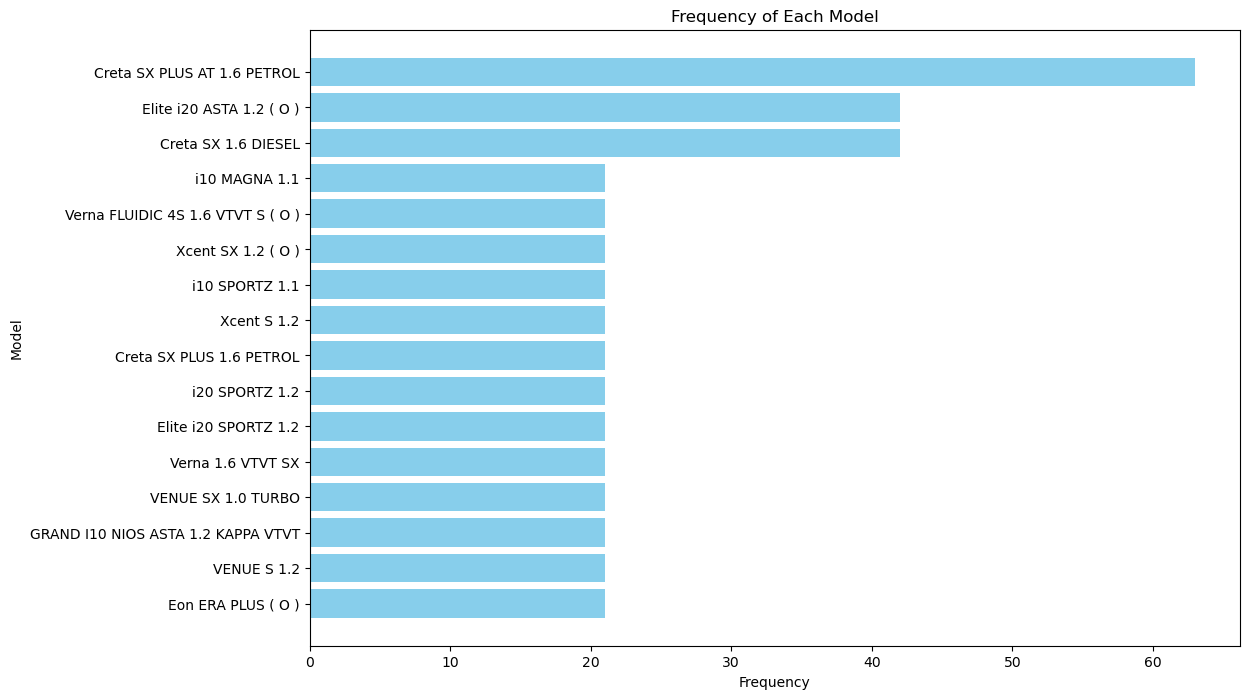

In [11]:
import matplotlib.pyplot as plt
models = [
    'Creta SX PLUS AT 1.6 PETROL',
    'Elite i20 ASTA 1.2 ( O )',
    'Creta SX 1.6 DIESEL',
    'i10 MAGNA 1.1',
    'Verna FLUIDIC 4S 1.6 VTVT S ( O )',
    'Xcent SX 1.2 ( O )',
    'i10 SPORTZ 1.1',
    'Xcent S 1.2',
    'Creta SX PLUS 1.6 PETROL',
    'i20 SPORTZ 1.2',
    'Elite i20 SPORTZ 1.2',
    'Verna 1.6 VTVT SX',
    'VENUE SX 1.0 TURBO',
    'GRAND I10 NIOS ASTA 1.2 KAPPA VTVT',
    'VENUE S 1.2',
    'Eon ERA PLUS ( O )'
]

frequencies = [
    63, 42, 42, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21
]

plt.figure(figsize=(12, 8))
plt.barh(models, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Model')
plt.title('Frequency of Each Model')
plt.gca().invert_yaxis()  
plt.show()


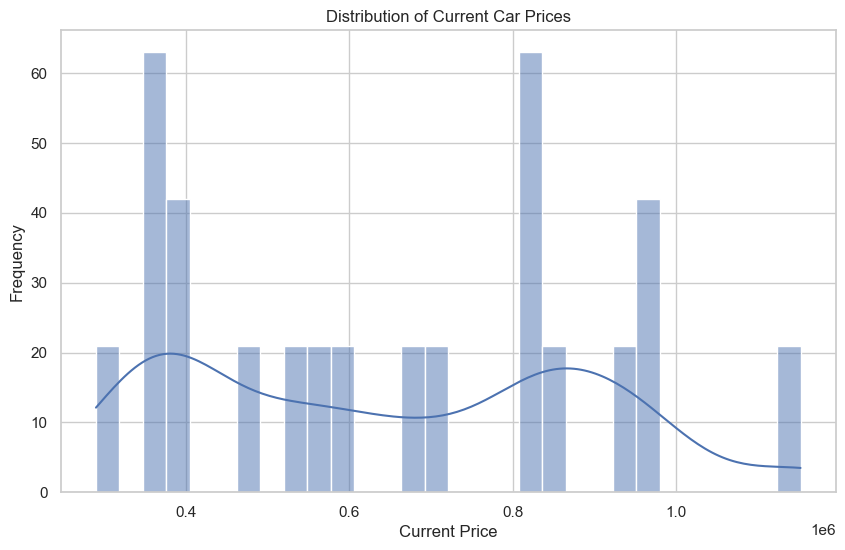

In [12]:
import seaborn as sns
sns.set(style="whitegrid")

# Histogram of the Current Price column
plt.figure(figsize=(10, 6))
sns.histplot(df['Current Price'], bins=30, kde=True)
plt.title('Distribution of Current Car Prices')
plt.xlabel('Current Price')
plt.ylabel('Frequency')
plt.show()

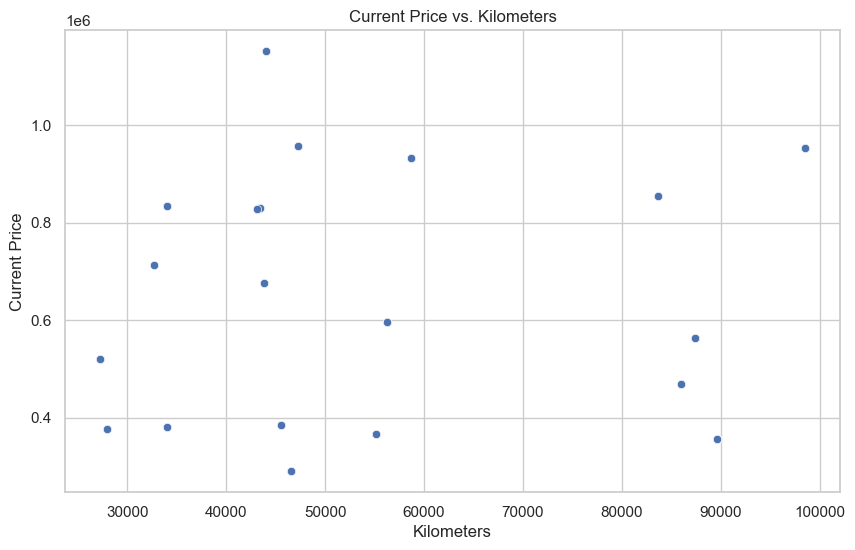

In [13]:
# Scatter plot between Current Price and Kilometers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilometers', y='Current Price', data=df)
plt.title('Current Price vs. Kilometers')
plt.xlabel('Kilometers')
plt.ylabel('Current Price')
plt.show()


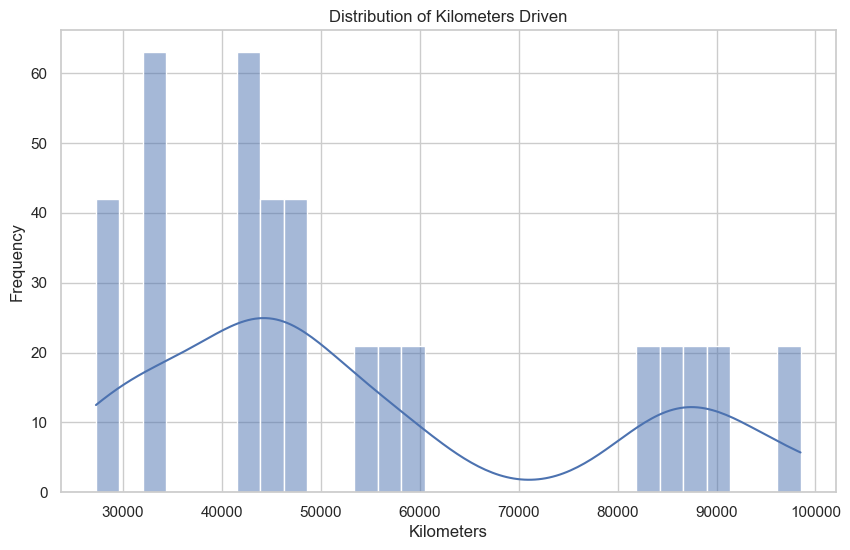

In [14]:
# Histogram of the Kilometers column
plt.figure(figsize=(10, 6))
sns.histplot(df['Kilometers'], bins=30, kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers')
plt.ylabel('Frequency')
plt.show()


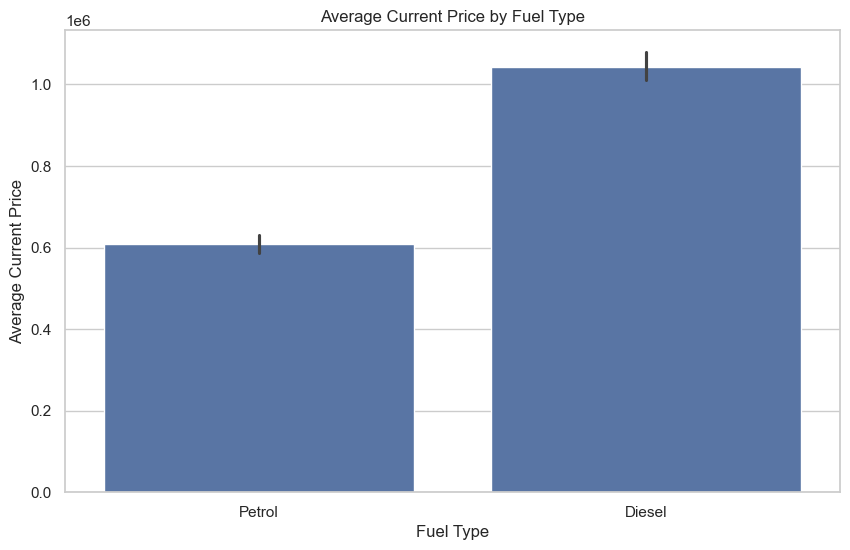

In [15]:
# Bar plot of average Current Price by Fuel Type 
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel Type', y='Current Price', data=df, estimator=np.mean)
plt.title('Average Current Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Current Price')
plt.show()


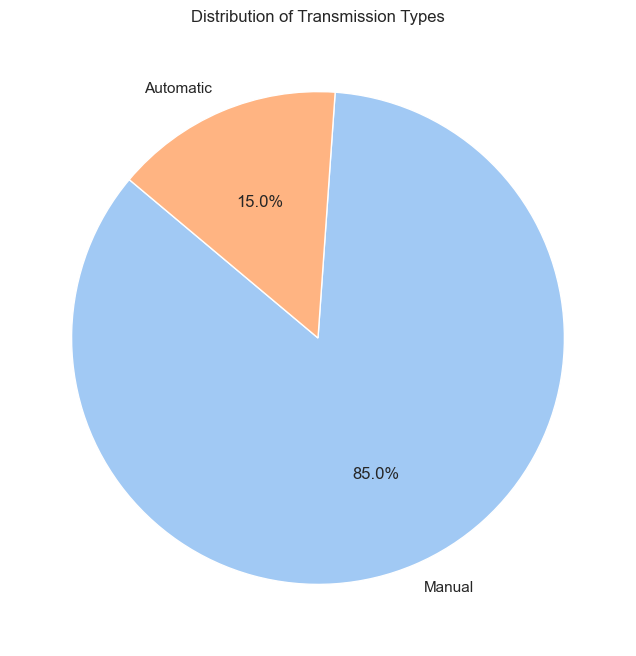

In [16]:
# Pie chart of Transmission types Automatic and Manual 
plt.figure(figsize=(8, 8))
df['Transmission'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Transmission Types')
plt.ylabel('')
plt.show()


C:\Users\ABHI MANE\AppData\Local\Temp\ipykernel_20852\1622613812.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Fuel Type', y='EMI per month', data=df, estimator=np.mean, ci=None)


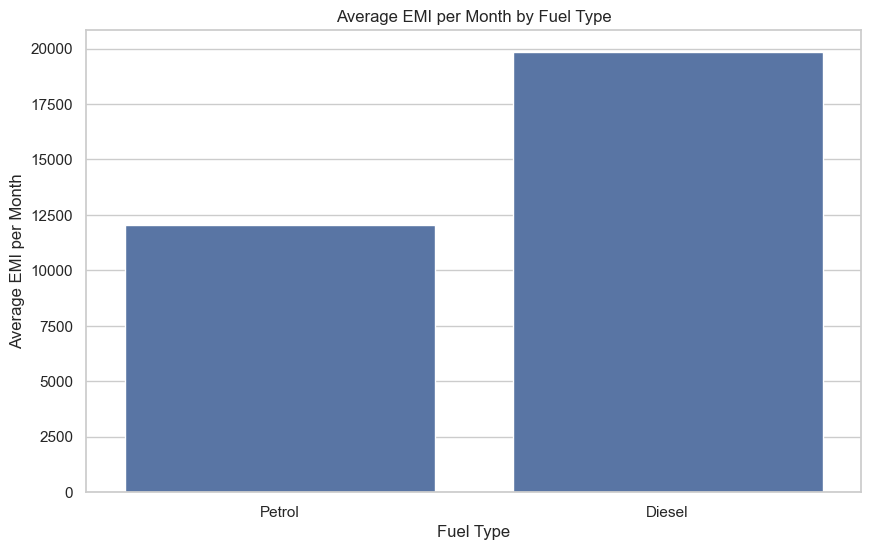

In [17]:
# Bar plot of average 'EMI per month' by 'Fuel Type'
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel Type', y='EMI per month', data=df, estimator=np.mean, ci=None)
plt.title('Average EMI per Month by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average EMI per Month')
plt.show()


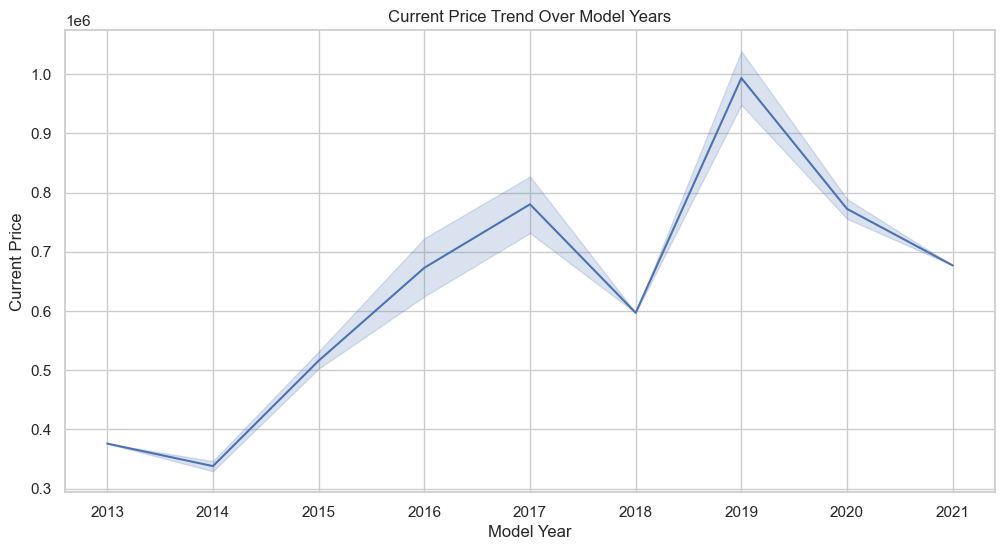

In [18]:
# Line plot of Current Price over Model Year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Current Price', data=df)
plt.title('Current Price Trend Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Current Price')
plt.show()


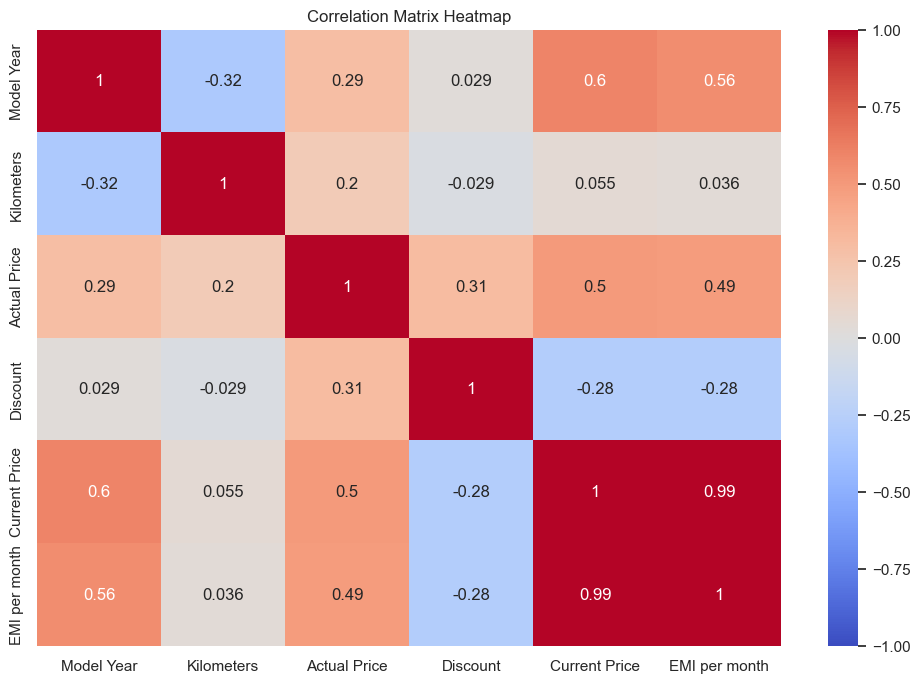

In [19]:
# Select only the numeric columns in the dataset 
numeric_df = df.select_dtypes(include=[np.number])
numeric_df

# Heatmap of correlation matrix Using Numeric Columns 
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
cleaned_file_path = r'C:\Users\ABHI MANE\Downloads\Evo Ven Project E/cars24_data_cleaned_Analyzed.csv'
df.to_csv(cleaned_file_path, index=False)

print("Cleaned data saved to:", cleaned_file_path)

Cleaned data saved to: C:\Users\ABHI MANE\Downloads\Evo Ven Project E/cars24_data_cleaned_Analyzed.csv


# TATA ANALYSIS

## TATA_CARS_SCRAPING

In [1]:
# import the libraries
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# get the website - SUV
website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Atata&sort=bestmatch&serveWarrantyCount=true&gaId=350956367.1722604688&storeCityId=2378'
request = requests.get(website)
print(request)

<Response [200]>


Request accepted

In [4]:
# creating a BS instance
soup = BeautifulSoup(request.content, 'html.parser')

In [5]:
# for all the cars
cars = soup.find_all('a', class_ = 'IIJDn')

In [6]:
"""
Function to obtain the Car Model Year, Car Brand and Car Model
"""
def car_model_details(car):
    car_model = car.find('h3')
    model_details = word_tokenize(car_model.text)
    model_year = model_details[0]
    brand = model_details[1]
    model_list = model_details[2:]
    model = ' '.join(model_list)
    return model_year, brand, model

In [7]:
"""
Function to obtain the Kilometers Travelled, Fuel Type and Transmission Type
"""
def car_features(car):
    lst = []

    for item in car.find_all('li'):
        lst.append(item.text)

    kms = lst[0].replace('km', '').strip().replace(',', '') # removing 'km' and the trailing space
    fuel = lst[2]
    transmission = lst[4]

    return kms, fuel, transmission

In [8]:
"""
Function to obtain the Actual Price, Discount Price, Current Price and EMI per month
"""
def pricing_details(car):
    def extract_price(text, pattern):
        match = re.search(pattern, text)
        if match:
            return float(match.group(1).replace(',', ''))
        return None

    try:
        # Actual Price
        actual_element = car.find('span', class_='_30QQ7')
        if actual_element:
            actual = actual_element.text
            actual_price = extract_price(actual, r'₹(\d+\.?\d*) Lakh')
            if actual_price is not None:
                actual_price = round(actual_price * 100000, 2)
            else:
                actual_price = 0
        else:
            actual_price = 0

        # Discount Price
        discount_element = car.find('span', class_='YWP1x')
        if discount_element:
            discount = discount_element.text
            discount_price = extract_price(discount, r'\((\d+\.?\d*)k off\)')
            if discount_price is not None:
                discount_price *= 1000
            else:
                discount_price = 0
        else:
            discount_price = 0

        # Current Price
        current_element = car.find('strong', class_='_3RL-I')
        if current_element:
            current = current_element.text
            current_price = extract_price(current, r'₹(\d+\.?\d*) Lakh')
            if current_price is not None:
                current_price = round(current_price * 100000, 2)
            else:
                current_price = 0
        else:
            current_price = 0

        # EMI Plan per Month
        emi_element = car.find('span', class_='_2O0yU')
        if emi_element:
            emi = emi_element.text
            emi_plan_per_month = extract_price(emi, r'₹([\d,]+)/month')
            if emi_plan_per_month is None:
                emi_plan_per_month = 0
        else:
            emi_plan_per_month = 0

        return actual_price, discount_price, current_price, emi_plan_per_month

    except:
        return 0, 0, 0, 0

In [9]:
"""
Function to obtain the Details regarding Test Drive such as Test Drive Location and Day
"""
def test_drive_details(car):
    test = []
    out = car.find('span', class_ = '_1MKmC')
    if out is None:
        for item in car.find('p', class_ = '_3dGMY'):
            test.append(item.text)
        test_drive_day = test[1]
        test_drive_location = test[5]
        return test_drive_day, test_drive_location

    else:
        return 'Currently Tokened', 'NA'

In [10]:
# Collecting the Data
data = []
for car in cars:
    model_year, brand, model = car_model_details(car)
    kms, fuel_type, transmission = car_features(car)
    special_feature = car.find('span', class_ = '_3JoYA').text
    actual_price, discount, current_price, emi_plan_per_month = pricing_details(car)
    test_drive_day, test_drive_location = test_drive_details(car)
    data.append([model_year, brand, model, kms, fuel_type, transmission, special_feature, actual_price, discount, current_price, emi_plan_per_month, test_drive_day, test_drive_location])

df = pd.DataFrame(data, columns=['Model Year', 'Brand', 'Model', 'Kilometers', 'Fuel Type', 'Transmission', 'Special Feature', 'Actual Price', 'Discount', 'Current Price', 'EMI per month', 'Test Drive Day', 'Test Drive Location'])

## **Scraping for different features**

In [11]:
# Diesel cars
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Adiesel&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'
diesal_df = df.copy()
diesal_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [12]:
# SUV cars
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Ccng&f=bodyType%3Ain%3Asuv&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

suv_df = df.copy()
suv_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [13]:
# four seater
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Ccng&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A4&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

four_seater_df = df.copy()
four_seater_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [14]:
# cruise control
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Ccng&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A5%2C6%2C7%2C8%2C9&f=features%3Ain%3Acruise%20control&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

cruise_control_df = df.copy()
cruise_control_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [15]:
# CNG
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Acng&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A5%2C6%2C7%2C8%2C9&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

cng_df = df.copy()
cng_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [16]:
# rating_1
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A5%2C6%2C7%2C8%2C9&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=ncapRating%3Ain%3A1&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

rating_1_df = df.copy()
rating_1_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [17]:
# red, black, purple
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A5%2C6%2C7%2C8%2C9&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Ablack%2Cpurple%2Cred&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

red_black_purple_df = df.copy()
red_black_purple_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [18]:
# brown, orange
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A5%2C6%2C7%2C8%2C9&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Aorange%2Cbrown&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

orange_brown_df = df.copy()
orange_brown_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [19]:
# rto up
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Ablue%2Cwhite%2Csilver&f=stateRtoV2%3A%3D%3AUp&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

rto_up_df = df.copy()
rto_up_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [20]:
# 2014 to 2015
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2014%2C2015&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Ablue%2Cwhite%2Csilver&f=stateRtoV2%3A%3D%3ADl%3AOR%3AstateRtoV2%3A%3D%3AHr&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

year_2014_2015_df = df.copy()
year_2014_2015_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [21]:
# 2015 to 2016
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2015%2C2016&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Ablue%2Cwhite%2Csilver&f=stateRtoV2%3A%3D%3ADl%3AOR%3AstateRtoV2%3A%3D%3AHr&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

year_2015_2016_df = df.copy()
year_2015_2016_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [22]:
# sedan
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Asedan&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Ablue%2Cwhite%2Csilver&f=stateRtoV2%3A%3D%3ADl%3AOR%3AstateRtoV2%3A%3D%3AHr&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

sedan_df = df.copy()
sedan_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [23]:
# automatic
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Ablue%2Cwhite%2Csilver&f=stateRtoV2%3A%3D%3ADl%3AOR%3AstateRtoV2%3A%3D%3AHr&f=transmission%3Ain%3Aautomatic&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

automatic_df = df.copy()
automatic_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [24]:
# second owner
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Ablue%2Csilver%2Cwhite&f=stateRtoV2%3A%3D%3ADl%3AOR%3AstateRtoV2%3A%3D%3AHr&f=transmission%3Ain%3Amanual&f=ownerNumber%3Ain%3A2&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

second_owner_df = df.copy()
second_owner_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [25]:
# white
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Awhite&f=stateRtoV2%3A%3D%3ADl%3AOR%3AstateRtoV2%3A%3D%3AHr&f=transmission%3Ain%3Amanual&f=ownerNumber%3Ain%3A1&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

white_df = df.copy()
white_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [26]:
# blue
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=stateRtoV2%3A%3D%3ADl%3AOR%3AstateRtoV2%3A%3D%3AHr&f=transmission%3Ain%3Amanual&f=ownerNumber%3Ain%3A1&f=color%3Ain%3Ablue&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

blue_df = df.copy()
blue_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [27]:
# alloy, push start, stereo
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Apush%20button%20start%2Calloy%20wheels%2Cinfotainment%20system&f=stateRtoV2%3A%3D%3ADl%3AOR%3AstateRtoV2%3A%3D%3AHr&f=transmission%3Ain%3Amanual&f=ownerNumber%3Ain%3A1&f=color%3Ain%3Asilver&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

alloy_push_start_stereo_df = df.copy()
alloy_push_start_stereo_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [28]:
# RTO HR
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=stateRtoV2%3A%3D%3AHr&f=transmission%3Ain%3Amanual&f=ownerNumber%3Ain%3A1&f=color%3Ain%3Asilver&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

rto_hr_df = df.copy()
rto_hr_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [29]:
# steering control
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asteering%20mounted%20controls&f=transmission%3Ain%3Amanual&f=ownerNumber%3Ain%3A1&f=color%3Ain%3Asilver&f=stateRtoV2%3A%3D%3ADl&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

steering_control_df = df.copy()
steering_control_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [30]:
# 2016 to 2020
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2020&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Aparking%20sensors%2Cairbags&f=transmission%3Ain%3Amanual&f=ownerNumber%3Ain%3A1&f=color%3Ain%3Asilver&f=stateRtoV2%3A%3D%3ADl&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

year_2016_2020_df = df.copy()
year_2016_2020_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [31]:
# 2020 to 2024
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2020%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Aparking%20sensors%2Cairbags&f=transmission%3Ain%3Amanual&f=ownerNumber%3Ain%3A1&f=color%3Ain%3Asilver&f=stateRtoV2%3A%3D%3ADl&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

year_2020_2024_df = df.copy()
year_2020_2024_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [32]:
# Combining the datasets
dataframes = [
    diesal_df, suv_df, four_seater_df, cruise_control_df, cng_df, rating_1_df,
    red_black_purple_df, orange_brown_df, rto_up_df, year_2014_2015_df, year_2015_2016_df,
    sedan_df, automatic_df, second_owner_df, white_df, blue_df, alloy_push_start_stereo_df,
    rto_hr_df, steering_control_df, year_2016_2020_df, year_2020_2024_df
]

# Concatenate along columns (axis=1)
cars24_df = pd.concat(dataframes, axis=0)

# Reset the index
cars24_df.reset_index(drop=True, inplace=True)
cars24_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000.0,46000.0,416000.0,8133.0,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000.0,52190.0,390000.0,7621.0,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000.0,76000.0,514000.0,10049.0,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000.0,58240.0,744000.0,14541.0,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000.0,46000.0,862000.0,16407.0,Today,"Mulund West, Mumbai \n"


In [33]:
cars24_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Model Year           420 non-null    object 
 1   Brand                420 non-null    object 
 2   Model                420 non-null    object 
 3   Kilometers           420 non-null    object 
 4   Fuel Type            420 non-null    object 
 5   Transmission         420 non-null    object 
 6   Special Feature      420 non-null    object 
 7   Actual Price         420 non-null    float64
 8   Discount             420 non-null    float64
 9   Current Price        420 non-null    float64
 10  EMI per month        420 non-null    float64
 11  Test Drive Day       420 non-null    object 
 12  Test Drive Location  420 non-null    object 
dtypes: float64(4), object(9)
memory usage: 42.8+ KB


In [35]:
# save the file to csv format
cars24_df.to_csv('cars24_data_tata.csv', index=False)

In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cars24_data_tata.csv


In [14]:
tata_df = pd.read_csv('/kaggle/input/cars24_data_tata.csv')

In [15]:
#printing the first 5 rows of data 
tata_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,94586,Petrol,Manual,Alloy wheels,462000,46000,416000,8133,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,37602,Petrol,Manual,Alloy wheels,442000,52190,390000,7621,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,32045,Petrol,Automatic,Top Model,590000,76000,514000,10049,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,13348,Petrol,Manual,Alloy wheels,802000,58240,744000,14541,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,13342,Petrol,Manual,Reg. serviced,908000,46000,862000,16407,Today,"Mulund West, Mumbai \n"


In [16]:
# getting information about our data 
tata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Model Year           420 non-null    int64 
 1   Brand                420 non-null    object
 2   Model                420 non-null    object
 3   Kilometers           420 non-null    int64 
 4   Fuel Type            420 non-null    object
 5   Transmission         420 non-null    object
 6   Special Feature      420 non-null    object
 7   Actual Price         420 non-null    int64 
 8   Discount             420 non-null    int64 
 9   Current Price        420 non-null    int64 
 10  EMI per month        420 non-null    int64 
 11  Test Drive Day       420 non-null    object
 12  Test Drive Location  420 non-null    object
dtypes: int64(6), object(7)
memory usage: 42.8+ KB


In [17]:
tata_df.shape

(420, 13)

In [18]:
print("Dypes:",tata_df.dtypes)
print("Columns:",tata_df.columns)

Dypes: Model Year              int64
Brand                  object
Model                  object
Kilometers              int64
Fuel Type              object
Transmission           object
Special Feature        object
Actual Price            int64
Discount                int64
Current Price           int64
EMI per month           int64
Test Drive Day         object
Test Drive Location    object
dtype: object
Columns: Index(['Model Year', 'Brand', 'Model', 'Kilometers', 'Fuel Type',
       'Transmission', 'Special Feature', 'Actual Price', 'Discount',
       'Current Price', 'EMI per month', 'Test Drive Day',
       'Test Drive Location'],
      dtype='object')


In [19]:
tata_df.describe()

,Model Year,Kilometers,Actual Price,Discount,Current Price,EMI per month
count,420.000000,420.000000,4.200000e+02,420.00000,4.200000e+02,420.000000
mean,2020.050000,41052.700000,8.794500e+05,40964.50000,7.952000e+05,15434.150000
std,1.566315,29866.289556,3.600508e+05,29515.09002,3.346971e+05,6263.474334
min,2017.000000,2973.000000,4.420000e+05,0.00000,3.900000e+05,7621.000000
25%,2019.000000,15789.250000,7.255000e+05,0.00000,6.637500e+05,12980.250000
50%,2020.000000,37377.000000,8.200000e+05,50500.00000,7.260000e+05,14700.000000
75%,2021.250000,54485.250000,9.742500e+05,60362.50000,8.635000e+05,16434.250000
max,2022.000000,104792.000000,2.100000e+06,84000.00000,1.878000e+06,35754.000000


In [20]:
tata_df.isnull()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,False,False,False,False,False,False,False,False,False,False,False,False,False
416,False,False,False,False,False,False,False,False,False,False,False,False,False
417,False,False,False,False,False,False,False,False,False,False,False,False,False
418,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
tata_df['Current Price']

0      416000
1      390000
2      514000
3      744000
4      862000
        ...  
415    773000
416    868000
417    836000
418    898000
419    667000
Name: Current Price, Length: 420, dtype: int64

In [22]:
#average of current price 
mean_price = tata_df['Current Price'].mean()
print(mean_price)

795200.0


In [23]:
#checking missing value on dataset :
print("Missing values in  tata_df:\n" , tata_df.isnull().sum())

Missing values in  tata_df:
 Model Year             0
Brand                  0
Model                  0
Kilometers             0
Fuel Type              0
Transmission           0
Special Feature        0
Actual Price           0
Discount               0
Current Price          0
EMI per month          0
Test Drive Day         0
Test Drive Location    0
dtype: int64


# there is no missing values in our data set 

In [24]:
print(tata_df.Kilometers.mean()) 
('\n')
print(tata_df.Kilometers.median())
('\n')
print(tata_df.Kilometers.mode())

41052.7
37377.0
0       2973
1       5837
2      11670
3      13342
4      13348
5      16603
6      18438
7      18598
8      32045
9      37152
10     37602
11     39046
12     47992
13     51506
14     52045
15     61806
16     71356
17     90317
18     94586
19    104792
Name: Kilometers, dtype: int64


# standardizing the data 

In [25]:
scaler = StandardScaler()
numerical_features = ['Kilometers', 'Actual Price', 'Discount', 'Current Price', 'EMI per month']
tata_df[numerical_features] = scaler.fit_transform(tata_df[numerical_features])
print(tata_df[numerical_features])

     Kilometers  Actual Price  Discount  Current Price  EMI per month
0      1.794570     -1.160802  0.170811      -1.134316      -1.167061
1     -0.115676     -1.216416  0.380784      -1.212091      -1.248902
2     -0.301961     -0.804873  1.188453      -0.841165      -0.860796
3     -0.928731     -0.215365  0.586009      -0.153157      -0.142767
4     -0.928932      0.079389  0.170811       0.199821       0.155506
..          ...           ...       ...            ...            ...
415    0.695702     -0.151409  0.374339      -0.066408      -0.051494
416   -1.276527      0.374143 -1.389572       0.217769       0.172930
417    0.350421      0.262915 -1.389572       0.122047       0.076383
418   -0.752738      0.265696  1.222374       0.307510       0.265161
419   -0.067270     -0.404453  0.874001      -0.383490      -0.381897

[420 rows x 5 columns]


In [26]:
#converting Model Year into datetime
tata_df['Model Year'] = tata_df['Model Year'].astype('category')
print(tata_df['Model Year'])

0      2018
1      2017
2      2019
3      2021
4      2021
       ... 
415    2019
416    2022
417    2019
418    2022
419    2021
Name: Model Year, Length: 420, dtype: category
Categories (6, int64): [2017, 2018, 2019, 2020, 2021, 2022]


In [27]:
tata_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2018,Tata,TIGOR XZ PETROL,1.794570,Petrol,Manual,Alloy wheels,-1.160802,0.170811,-1.134316,-1.167061,Today,"Goregaon, Mumbai"
1,2017,Tata,Tiago XZ PETROL,-0.115676,Petrol,Manual,Alloy wheels,-1.216416,0.380784,-1.212091,-1.248902,Today,"Mulund West, Mumbai \n"
2,2019,Tata,Tiago XZA PETROL,-0.301961,Petrol,Automatic,Top Model,-0.804873,1.188453,-0.841165,-0.860796,Today,"Goregaon, Mumbai"
3,2021,Tata,ALTROZ XZ PLUS PETROL,-0.928731,Petrol,Manual,Alloy wheels,-0.215365,0.586009,-0.153157,-0.142767,Today,"Mulund West, Mumbai \n"
4,2021,Tata,NEXON XZ PETROL,-0.928932,Petrol,Manual,Reg. serviced,0.079389,0.170811,0.199821,0.155506,Today,"Mulund West, Mumbai \n"


In [28]:
#removing columns that is not necessary for analysis
#tata_df.drop(columns=['Test Drive Day', 'Test Drive Location'], inplace=True)

#checking the columns 
columns_to_drop = ['Test Drive Day', 'Test Drive Location']
existing_columns_to_drop = [col for col in columns_to_drop if col in tata_df.columns]

# Drop columns if they exist
if existing_columns_to_drop:
    tata_df.drop(columns=existing_columns_to_drop, inplace=True)
else:
    print(f"No columns to drop from: {columns_to_drop}")


In [29]:
# Validating the data consistency
inconsistent_data = tata_df[tata_df['Current Price'] > tata_df['Actual Price']]
print("Inconsistent data:\n", inconsistent_data.shape)

Inconsistent data:
 (231, 11)


In [30]:
#inconsistency is too high (swap the value) 
for index, row in inconsistent_data.iterrows():
     if row['Discount'] < 0:  # If discount is negative, Current Price might have been mistakenly recorded as Actual Price
        tata_df.at[index, 'Current Price'], tata_df.at[index, 'Actual Price'] = row['Actual Price'], row['Current Price']

tata_df_cleaned = tata_df
print("Cleaned data (after handling inconsistencies):\n", tata_df_cleaned)

Cleaned data (after handling inconsistencies):
     Model Year Brand                  Model  Kilometers Fuel Type  \
0         2018  Tata        TIGOR XZ PETROL    1.794570    Petrol   
1         2017  Tata        Tiago XZ PETROL   -0.115676    Petrol   
2         2019  Tata       Tiago XZA PETROL   -0.301961    Petrol   
3         2021  Tata  ALTROZ XZ PLUS PETROL   -0.928731    Petrol   
4         2021  Tata        NEXON XZ PETROL   -0.928932    Petrol   
..         ...   ...                    ...         ...       ...   
415       2019  Tata  NEXON XZA PLUS PETROL    0.695702    Petrol   
416       2022  Tata        ALTROZ XZA PLUS   -1.276527    Petrol   
417       2019  Tata  NEXON XZA PLUS DIESEL    0.350421    Diesel   
418       2022  Tata   NEXON XZ PLUS PETROL   -0.752738    Petrol   
419       2021  Tata  TIGOR XZA PLUS PETROL   -0.067270    Petrol   

    Transmission Special Feature  Actual Price  Discount  Current Price  \
0         Manual    Alloy wheels     -1.160802  

# FINAL CLEANED DATA

# **Data Visualization**

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


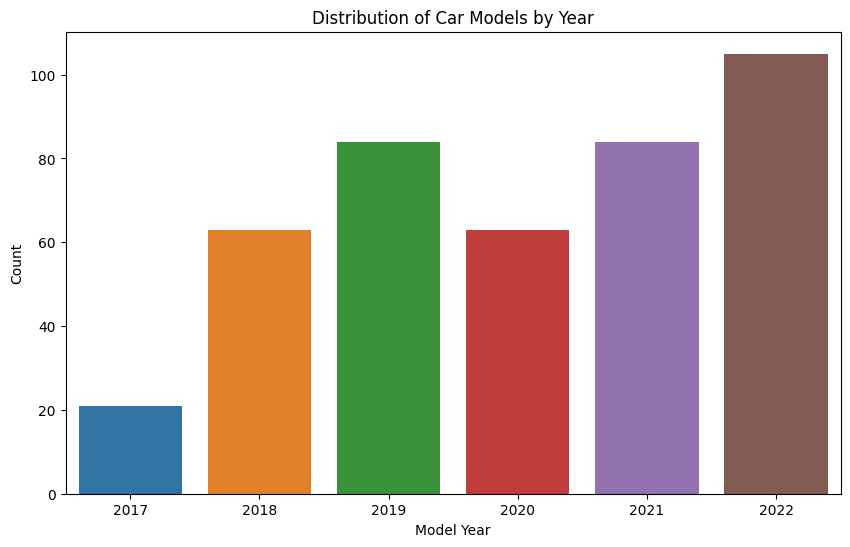

In [34]:
# Distribution of car models by year
plt.figure(figsize=(10, 6))
sns.countplot(data=tata_df, x='Model Year')
plt.title('Distribution of Car Models by Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

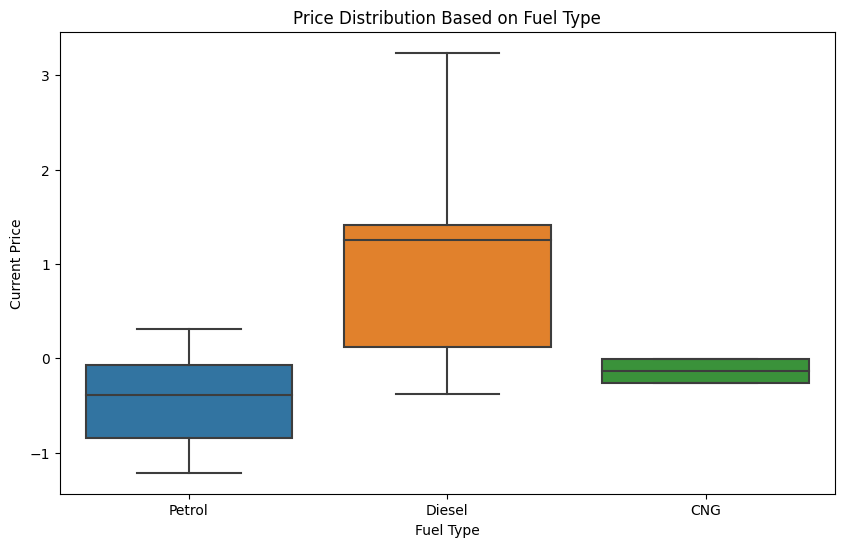

In [35]:
# Price distribution based on fuel type

plt.figure(figsize=(10, 6))
sns.boxplot(data=tata_df, x='Fuel Type', y='Current Price')
plt.title('Price Distribution Based on Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Current Price')
plt.show()

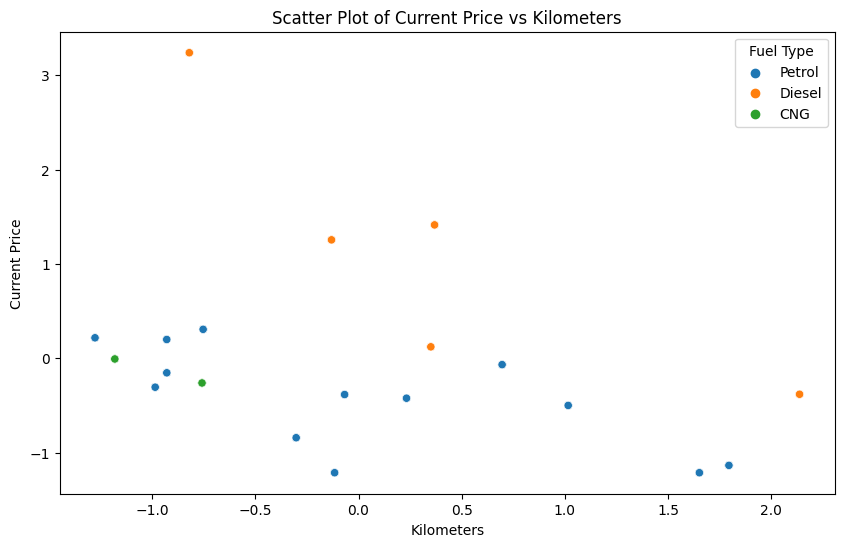

In [36]:
# Relationship between the current price of cars and the kilometers driven, with different colors representing fuel types

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tata_df, x='Kilometers', y='Current Price', hue='Fuel Type')
plt.title('Scatter Plot of Current Price vs Kilometers')
plt.xlabel('Kilometers')
plt.ylabel('Current Price')
plt.legend(title='Fuel Type')
plt.show()


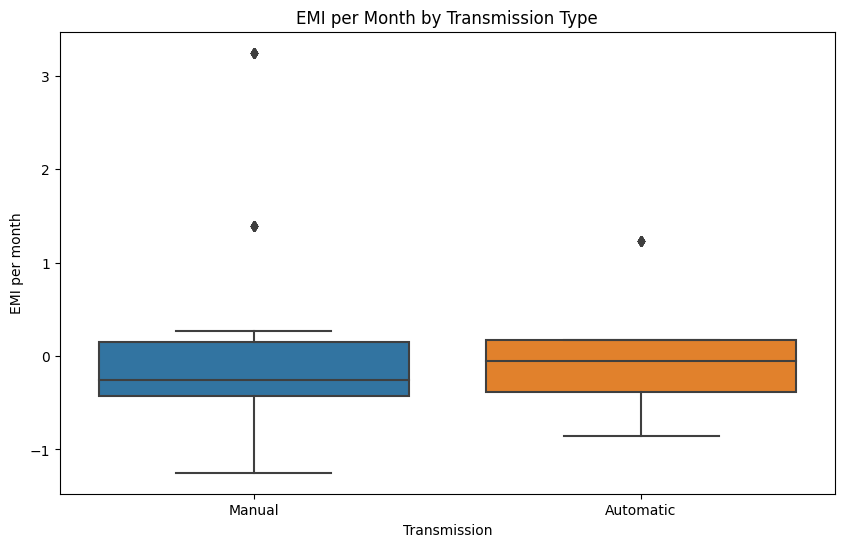

In [37]:
# Plot of EMI per month for cars based on their transmission type (Manual or Automatic)
plt.figure(figsize=(10, 6))
sns.boxplot(data=tata_df, x='Transmission', y='EMI per month')
plt.title('EMI per Month by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('EMI per month')
plt.show()


/tmp/ipykernel_33/603354918.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_year = tata_df.groupby('Model Year')['Current Price'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


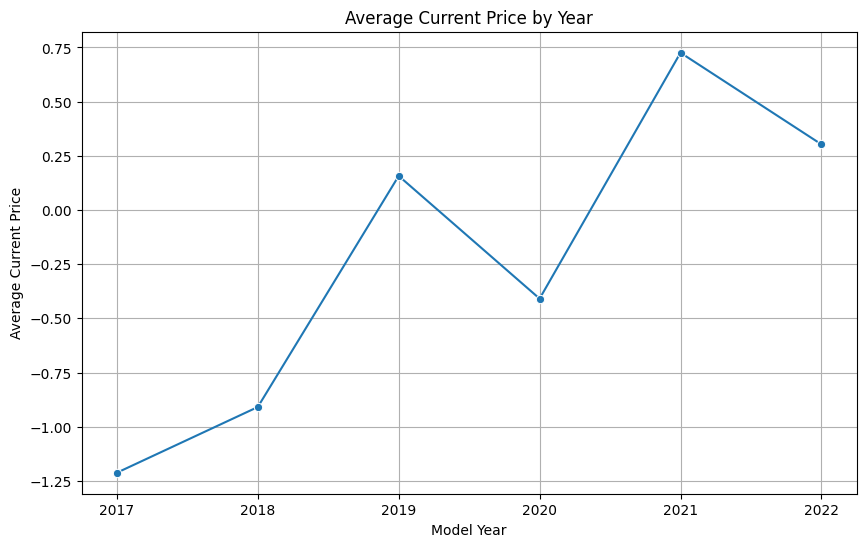

In [38]:
# This line plot shows the trend of the average current price of cars by year.It helps to identify any increase or decrease in average prices over the years.
plt.figure(figsize=(10, 6))
avg_price_by_year = tata_df.groupby('Model Year')['Current Price'].mean().reset_index()
sns.lineplot(data=avg_price_by_year, x='Model Year', y='Current Price', marker='o')
plt.title('Average Current Price by Year')
plt.xlabel('Model Year')
plt.ylabel('Average Current Price')
plt.grid(True)
plt.show()


/tmp/ipykernel_33/494646302.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_emi_by_year = tata_df.groupby('Model Year')['EMI per month'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


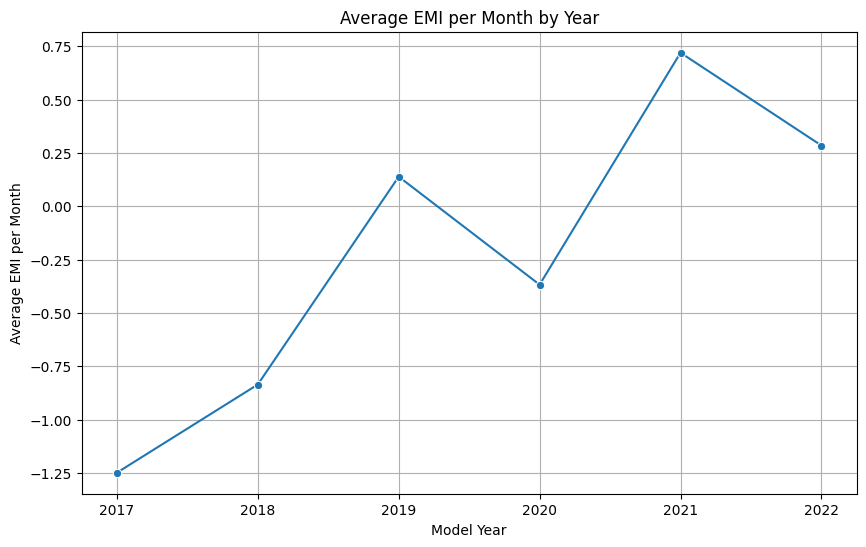

In [40]:
# This line plot shows the trend of the average EMI per month by year. It helps to understand the changes in EMI amounts over the years.
plt.figure(figsize=(10, 6))
avg_emi_by_year = tata_df.groupby('Model Year')['EMI per month'].mean().reset_index()
sns.lineplot(data=avg_emi_by_year, x='Model Year', y='EMI per month', marker='o')
plt.title('Average EMI per Month by Year')
plt.xlabel('Model Year')
plt.ylabel('Average EMI per Month')
plt.grid(True)
plt.show()


# Relationship between Features and Prices

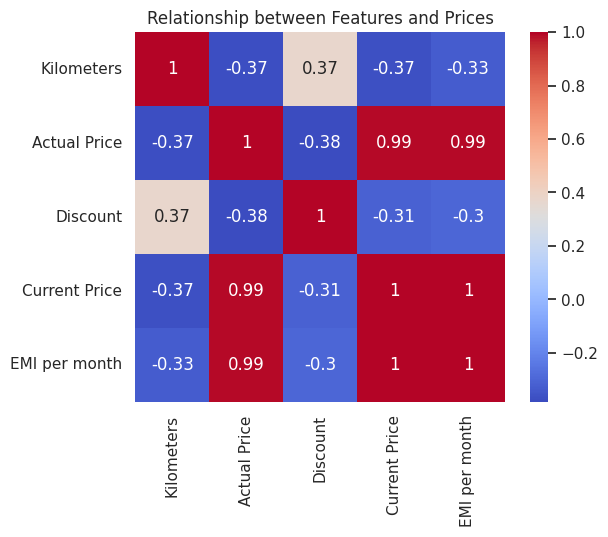

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

tata_df1 = tata_df.select_dtypes(include=['int64', 'float64'])  # select only numerical columns
sns.set()
sns.heatmap(tata_df1.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Relationship between Features and Prices')
plt.show()

# Distribution of Current_price by transmission type

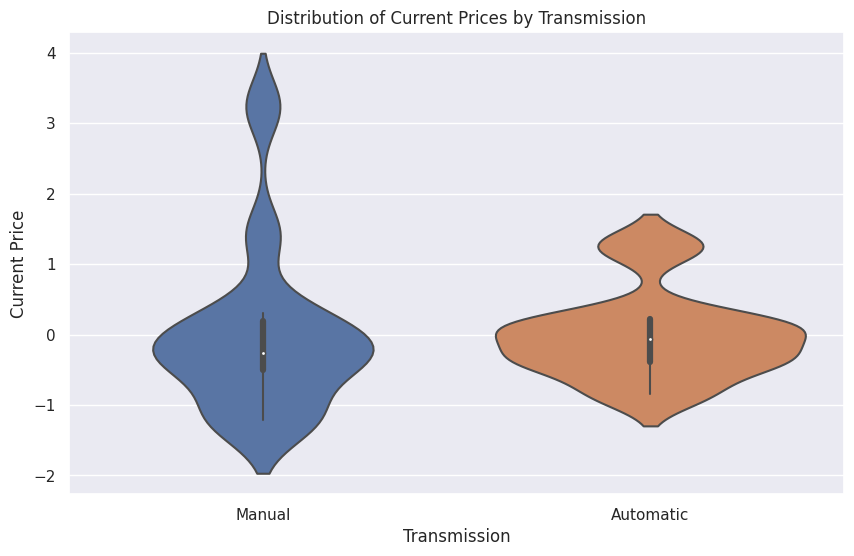

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Transmission', y='Current Price', data=tata_df)
plt.xlabel('Transmission')
plt.ylabel('Current Price')
plt.title('Distribution of Current Prices by Transmission')
plt.show()

### Analysis of Maruti Brand
##### In this .ipynb file we have done the analysis on Maruti Cars 

# Web Scraping


In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# get the website - SUV
website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&sort=bestmatch&serveWarrantyCount=true&listingSource=Homepage_Filters&storeCityId=2'
request = requests.get(website)
print(request)

<Response [200]>


Request accepted

In [7]:
# creating a BS instance
soup = BeautifulSoup(request.content, 'html.parser')

In [8]:
# for all the cars
cars = soup.find_all('a', class_ = 'IIJDn')

In [9]:
"""
Function to obtain the Car Model Year, Car Brand and Car Model
"""
def car_model_details(car):
    car_model = car.find('h3')
    model_details = word_tokenize(car_model.text)
    model_year = model_details[0]
    brand = model_details[1]
    model_list = model_details[2:]
    model = ' '.join(model_list)
    return model_year, brand, model

In [10]:
"""
Function to obtain the Kilometers Travelled, Fuel Type and Transmission Type
"""
def car_features(car):
    lst = []

    for item in car.find_all('li'):
        lst.append(item.text)

    kms = lst[0].replace('km', '').strip().replace(',', '') # removing 'km' and the trailing space
    fuel = lst[2]
    transmission = lst[4]

    return kms, fuel, transmission

In [11]:
"""
Function to obtain the Actual Price, Discount Price, Current Price and EMI per month
"""
def pricing_details(car):
    def extract_price(text, pattern):
        match = re.search(pattern, text)
        if match:
            return float(match.group(1).replace(',', ''))
        return None

    try:
        # Actual Price
        actual_element = car.find('span', class_='_30QQ7')
        if actual_element:
            actual = actual_element.text
            actual_price = extract_price(actual, r'₹(\d+\.?\d*) Lakh')
            if actual_price is not None:
                actual_price = round(actual_price * 100000, 2)
            else:
                actual_price = 0
        else:
            actual_price = 0

        # Discount Price
        discount_element = car.find('span', class_='YWP1x')
        if discount_element:
            discount = discount_element.text
            discount_price = extract_price(discount, r'\((\d+\.?\d*)k off\)')
            if discount_price is not None:
                discount_price *= 1000
            else:
                discount_price = 0
        else:
            discount_price = 0

        # Current Price
        current_element = car.find('strong', class_='_3RL-I')
        if current_element:
            current = current_element.text
            current_price = extract_price(current, r'₹(\d+\.?\d*) Lakh')
            if current_price is not None:
                current_price = round(current_price * 100000, 2)
            else:
                current_price = 0
        else:
            current_price = 0

        # EMI Plan per Month
        emi_element = car.find('span', class_='_2O0yU')
        if emi_element:
            emi = emi_element.text
            emi_plan_per_month = extract_price(emi, r'₹([\d,]+)/month')
            if emi_plan_per_month is None:
                emi_plan_per_month = 0
        else:
            emi_plan_per_month = 0

        return actual_price, discount_price, current_price, emi_plan_per_month

    except:
        return 0, 0, 0, 0

In [12]:
"""
Function to obtain the Details regarding Test Drive such as Test Drive Location and Day
"""
def test_drive_details(car):
    test = []
    out = car.find('span', class_ = '_1MKmC')
    if out is None:
        for item in car.find('p', class_ = '_3dGMY'):
            test.append(item.text)
        test_drive_day = test[1]
        test_drive_location = test[5]
        return test_drive_day, test_drive_location

    else:
        return 'Currently Tokened', 'NA'

In [13]:
# Collecting the Data
data = []
for car in cars:
    model_year, brand, model = car_model_details(car)
    kms, fuel_type, transmission = car_features(car)
    special_feature = car.find('span', class_ = '_3JoYA').text
    actual_price, discount, current_price, emi_plan_per_month = pricing_details(car)
    test_drive_day, test_drive_location = test_drive_details(car)
    data.append([model_year, brand, model, kms, fuel_type, transmission, special_feature, actual_price, discount, current_price, emi_plan_per_month, test_drive_day, test_drive_location])

df = pd.DataFrame(data, columns=['Model Year', 'Brand', 'Model', 'Kilometers', 'Fuel Type', 'Transmission', 'Special Feature', 'Actual Price', 'Discount', 'Current Price', 'EMI per month', 'Test Drive Day', 'Test Drive Location'])

## **Scraping for different features**

In [15]:
# Diesel cars
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Adiesel&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'
diesal_df = df.copy()
diesal_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [16]:
# SUV cars
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Ccng&f=bodyType%3Ain%3Asuv&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

suv_df = df.copy()
suv_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [17]:
# four seater
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Ccng&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A4&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

four_seater_df = df.copy()
four_seater_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [18]:
# cruise control
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Ccng&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A5%2C6%2C7%2C8%2C9&f=features%3Ain%3Acruise%20control&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

cruise_control_df = df.copy()
cruise_control_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [19]:
# CNG
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Acng&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A5%2C6%2C7%2C8%2C9&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

cng_df = df.copy()
cng_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [20]:
# rating_1
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A5%2C6%2C7%2C8%2C9&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=ncapRating%3Ain%3A1&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

rating_1_df = df.copy()
rating_1_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [21]:
# red, black, purple
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A5%2C6%2C7%2C8%2C9&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Ablack%2Cpurple%2Cred&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

red_black_purple_df = df.copy()
red_black_purple_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [22]:
# brown, orange
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A5%2C6%2C7%2C8%2C9&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Aorange%2Cbrown&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

orange_brown_df = df.copy()
orange_brown_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [23]:
# rto up
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2010%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Ablue%2Cwhite%2Csilver&f=stateRtoV2%3A%3D%3AUp&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

rto_up_df = df.copy()
rto_up_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [24]:
# 2014 to 2015
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2014%2C2015&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Ablue%2Cwhite%2Csilver&f=stateRtoV2%3A%3D%3ADl%3AOR%3AstateRtoV2%3A%3D%3AHr&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

year_2014_2015_df = df.copy()
year_2014_2015_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [25]:
# 2015 to 2016
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2015%2C2016&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback%2Csedan&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Ablue%2Cwhite%2Csilver&f=stateRtoV2%3A%3D%3ADl%3AOR%3AstateRtoV2%3A%3D%3AHr&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

year_2015_2016_df = df.copy()
year_2015_2016_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [26]:
# sedan
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Asedan&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Ablue%2Cwhite%2Csilver&f=stateRtoV2%3A%3D%3ADl%3AOR%3AstateRtoV2%3A%3D%3AHr&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

sedan_df = df.copy()
sedan_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [27]:
# automatic
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Ablue%2Cwhite%2Csilver&f=stateRtoV2%3A%3D%3ADl%3AOR%3AstateRtoV2%3A%3D%3AHr&f=transmission%3Ain%3Aautomatic&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

automatic_df = df.copy()
automatic_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [28]:
# second owner
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Ablue%2Csilver%2Cwhite&f=stateRtoV2%3A%3D%3ADl%3AOR%3AstateRtoV2%3A%3D%3AHr&f=transmission%3Ain%3Amanual&f=ownerNumber%3Ain%3A2&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

second_owner_df = df.copy()
second_owner_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [29]:
# white
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=color%3Ain%3Awhite&f=stateRtoV2%3A%3D%3ADl%3AOR%3AstateRtoV2%3A%3D%3AHr&f=transmission%3Ain%3Amanual&f=ownerNumber%3Ain%3A1&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

white_df = df.copy()
white_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [30]:
# blue
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asunroof%2Fmoonroof%2Cinfotainment%20system%2Cpush%20button%20start%2Calloy%20wheels%2Csteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=stateRtoV2%3A%3D%3ADl%3AOR%3AstateRtoV2%3A%3D%3AHr&f=transmission%3Ain%3Amanual&f=ownerNumber%3Ain%3A1&f=color%3Ain%3Ablue&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

blue_df = df.copy()
blue_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [31]:
# alloy, push start, stereo
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Apush%20button%20start%2Calloy%20wheels%2Cinfotainment%20system&f=stateRtoV2%3A%3D%3ADl%3AOR%3AstateRtoV2%3A%3D%3AHr&f=transmission%3Ain%3Amanual&f=ownerNumber%3Ain%3A1&f=color%3Ain%3Asilver&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

alloy_push_start_stereo_df = df.copy()
alloy_push_start_stereo_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [32]:
# RTO HR
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asteering%20mounted%20controls%2Cparking%20sensors%2Cairbags&f=stateRtoV2%3A%3D%3AHr&f=transmission%3Ain%3Amanual&f=ownerNumber%3Ain%3A1&f=color%3Ain%3Asilver&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

rto_hr_df = df.copy()
rto_hr_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [33]:
# steering control
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Asteering%20mounted%20controls&f=transmission%3Ain%3Amanual&f=ownerNumber%3Ain%3A1&f=color%3Ain%3Asilver&f=stateRtoV2%3A%3D%3ADl&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

steering_control_df = df.copy()
steering_control_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [34]:
# 2016 to 2020
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2016%2C2020&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Aparking%20sensors%2Cairbags&f=transmission%3Ain%3Amanual&f=ownerNumber%3Ain%3A1&f=color%3Ain%3Asilver&f=stateRtoV2%3A%3D%3ADl&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

year_2016_2020_df = df.copy()
year_2016_2020_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [35]:
# 2020 to 2024
# website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&f=listingPrice%3Abw%3A100000%2C2500000&f=year%3Abw%3A2020%2C2024&f=odometer%3Abw%3A0%2C125000&f=fuelType%3Ain%3Apetrol%2Celectric&f=bodyType%3Ain%3Ahatchback&f=seatNumber%3Ain%3A5&f=features%3Ain%3Aparking%20sensors%2Cairbags&f=transmission%3Ain%3Amanual&f=ownerNumber%3Ain%3A1&f=color%3Ain%3Asilver&f=stateRtoV2%3A%3D%3ADl&sort=bestmatch&serveWarrantyCount=true&gaId=1643295695.1722657371&listingSource=TabFilter&storeCityId=2'

year_2020_2024_df = df.copy()
year_2020_2024_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [36]:
# Combining the datasets
dataframes = [
    diesal_df, suv_df, four_seater_df, cruise_control_df, cng_df, rating_1_df,
    red_black_purple_df, orange_brown_df, rto_up_df, year_2014_2015_df, year_2015_2016_df,
    sedan_df, automatic_df, second_owner_df, white_df, blue_df, alloy_push_start_stereo_df,
    rto_hr_df, steering_control_df, year_2016_2020_df, year_2020_2024_df
]

# Concatenate along columns (axis=1)
cars24_df = pd.concat(dataframes, axis=0)

# Reset the index
cars24_df.reset_index(drop=True, inplace=True)
cars24_df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2021,Maruti,Ertiga ZXI+ SHVS,17163,Petrol,Manual,Top Model,0,0,0,0,Tomorrow,"Metro Walk, Rohini, New Delhi"
1,2019,Maruti,Swift ZXI PLUS AMT,40276,Petrol,Automatic,Top Model,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
2,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Chhatarpur, Delhi"
3,2023,Maruti,BREZZA ZXI SMART HYBRID,8502,Petrol,Manual,Sunroof,0,0,0,0,Tomorrow,"Parsvnath City Mall, Faridabad"
4,2022,Maruti,Alto VXI,2116,Petrol,Manual,Reg. serviced,0,0,0,0,Tomorrow,"Sector-18, Noida"


In [37]:
cars24_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Model Year           420 non-null    object
 1   Brand                420 non-null    object
 2   Model                420 non-null    object
 3   Kilometers           420 non-null    object
 4   Fuel Type            420 non-null    object
 5   Transmission         420 non-null    object
 6   Special Feature      420 non-null    object
 7   Actual Price         420 non-null    int64 
 8   Discount             420 non-null    int64 
 9   Current Price        420 non-null    int64 
 10  EMI per month        420 non-null    int64 
 11  Test Drive Day       420 non-null    object
 12  Test Drive Location  420 non-null    object
dtypes: int64(4), object(9)
memory usage: 42.8+ KB


In [38]:
# save the file to csv format
cars24_df.to_csv('cars24_data.csv', index=False)

## Data Cleaning

In [40]:
df = pd.read_csv("cars24_Maruti_data.csv")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Model Year           323 non-null    int64  
 1   Brand                323 non-null    object 
 2   Model                323 non-null    object 
 3   Kilometers           323 non-null    int64  
 4   Fuel Type            323 non-null    object 
 5   Transmission         323 non-null    object 
 6   Special Feature      323 non-null    object 
 7   Actual Price         323 non-null    float64
 8   Discount             323 non-null    float64
 9   Current Price        323 non-null    float64
 10  EMI per month        323 non-null    float64
 11  Test Drive Day       323 non-null    object 
 12  Test Drive Location  294 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 32.9+ KB


In [42]:
df.describe()

,Model Year,Kilometers,Actual Price,Discount,Current Price,EMI per month
count,323.000000,323.000000,3.230000e+02,323.000000,3.230000e+02,323.000000
mean,2019.003096,44130.705882,5.248700e+05,45075.170279,5.440805e+05,10822.442724
std,2.351818,27336.942618,2.482166e+05,28309.752345,1.487036e+05,3293.736751
min,2012.000000,476.000000,0.000000e+00,0.000000,2.900000e+05,5676.000000
25%,2017.000000,21566.000000,4.620000e+05,28000.000000,4.360000e+05,8655.500000
50%,2019.000000,39141.000000,5.430000e+05,49000.000000,5.150000e+05,10176.000000
75%,2021.000000,63046.000000,6.840000e+05,64010.000000,6.270000e+05,12342.500000
max,2023.000000,123772.000000,1.343000e+06,98970.000000,1.152000e+06,40870.000000


In [43]:
#Checking for missing values
df.isnull().sum()

Model Year              0
Brand                   0
Model                   0
Kilometers              0
Fuel Type               0
Transmission            0
Special Feature         0
Actual Price            0
Discount                0
Current Price           0
EMI per month           0
Test Drive Day          0
Test Drive Location    29
dtype: int64

In [44]:
#Checking for duplicate values
df.duplicated().sum()


75

In [45]:
#Converting the datatype of model year from string to int
df['Model Year'] = df['Model Year'].astype('int')


In [46]:
#converting the data type of kilometers from string to int
df['Kilometers'] = df['Kilometers'].astype('int')


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Model Year           323 non-null    int32  
 1   Brand                323 non-null    object 
 2   Model                323 non-null    object 
 3   Kilometers           323 non-null    int32  
 4   Fuel Type            323 non-null    object 
 5   Transmission         323 non-null    object 
 6   Special Feature      323 non-null    object 
 7   Actual Price         323 non-null    float64
 8   Discount             323 non-null    float64
 9   Current Price        323 non-null    float64
 10  EMI per month        323 non-null    float64
 11  Test Drive Day       323 non-null    object 
 12  Test Drive Location  294 non-null    object 
dtypes: float64(4), int32(2), object(7)
memory usage: 30.4+ KB


In [48]:
df.head()

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2019,Maruti,Vitara Brezza ZDI,102604,Diesel,Manual,Top Model,808000.0,0.0,686000.0,15260.0,Today,"Metro Walk, Rohini, New Delhi"
1,2015,Maruti,Baleno ALPHA DIESEL 1.3,70867,Diesel,Manual,Top Model,508000.0,48000.0,460000.0,40870.0,Today,"Metro Walk, Rohini, New Delhi"
2,2019,Maruti,Vitara Brezza ZDI AMT,28098,Diesel,Automatic,Top Model,830000.0,0.0,702000.0,15608.0,Today,"Metro Walk, Rohini, New Delhi"
3,2019,Maruti,Ciaz DELTA DIESEL 1.5,61329,Diesel,Manual,Spl. reg. no.,0.0,0.0,702000.0,15616.0,Today,"Metro Walk, Rohini, New Delhi"
4,2021,Maruti,Vitara Brezza VXI AT SHVS,29125,Petrol,Automatic,Safety specs.,891000.0,36000.0,855000.0,16274.0,Today,"M3M Urbana, Golf Course Ext., Gurugram"


In [49]:
#calculate the mode for each column
mode_values = df.mode().iloc[0]

In [50]:
#fill missing values values with the mode
df.fillna(mode_values,inplace = True)

In [51]:
df.isnull().sum()

Model Year             0
Brand                  0
Model                  0
Kilometers             0
Fuel Type              0
Transmission           0
Special Feature        0
Actual Price           0
Discount               0
Current Price          0
EMI per month          0
Test Drive Day         0
Test Drive Location    0
dtype: int64

In [52]:
df

,Model Year,Brand,Model,Kilometers,Fuel Type,Transmission,Special Feature,Actual Price,Discount,Current Price,EMI per month,Test Drive Day,Test Drive Location
0,2019,Maruti,Vitara Brezza ZDI,102604,Diesel,Manual,Top Model,808000.0,0.0,686000.0,15260.0,Today,"Metro Walk, Rohini, New Delhi"
1,2015,Maruti,Baleno ALPHA DIESEL 1.3,70867,Diesel,Manual,Top Model,508000.0,48000.0,460000.0,40870.0,Today,"Metro Walk, Rohini, New Delhi"
2,2019,Maruti,Vitara Brezza ZDI AMT,28098,Diesel,Automatic,Top Model,830000.0,0.0,702000.0,15608.0,Today,"Metro Walk, Rohini, New Delhi"
3,2019,Maruti,Ciaz DELTA DIESEL 1.5,61329,Diesel,Manual,Spl. reg. no.,0.0,0.0,702000.0,15616.0,Today,"Metro Walk, Rohini, New Delhi"
4,2021,Maruti,Vitara Brezza VXI AT SHVS,29125,Petrol,Automatic,Safety specs.,891000.0,36000.0,855000.0,16274.0,Today,"M3M Urbana, Golf Course Ext., Gurugram"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,2020,Maruti,S PRESSO VXI+,476,Petrol,Manual,Top Model,469000.0,71620.0,397000.0,7769.0,Today,"Sector-18, Noida"
319,2021,Maruti,S PRESSO VXI+,12058,Petrol,Manual,Top Model,469000.0,35900.0,433000.0,8467.0,Today,"Sector-18, Noida"
320,2022,Maruti,IGNIS ZETA 1.2,14907,Petrol,Manual,Alloy wheels,0.0,0.0,590000.0,11535.0,Today,"Sector-18, Noida"
321,2023,Maruti,IGNIS SIGMA 1.2,10469,Petrol,Manual,Reg. serviced,0.0,0.0,523000.0,10225.0,Today,"Chhatarpur, Delhi"


## Data Visualization and insights for Maruti cars

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

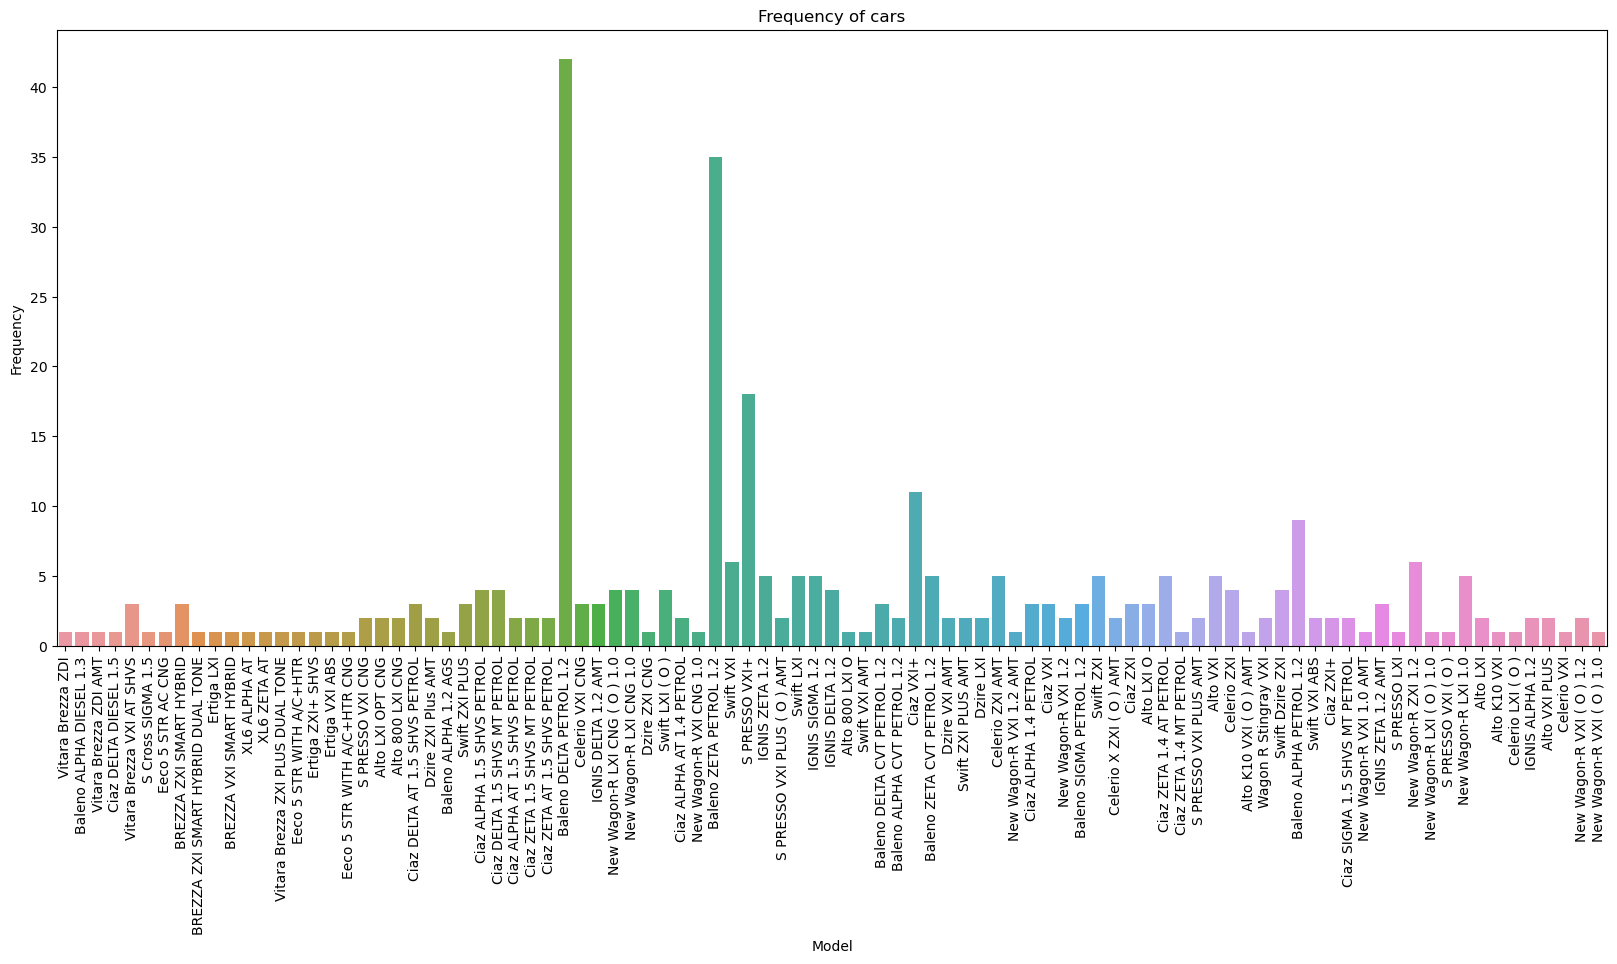

In [55]:
# Most Popular model
plt.figure(figsize=(20, 8))
sns.countplot(x='Model', data=df)
plt.xticks(rotation=90)
plt.title('Frequency of cars')
plt.ylabel('Frequency')
plt.show()

In [56]:
pop_car = df['Model'].value_counts().idxmax()
print(f'Most popular car among the users is {pop_car}.')

Most popular car among the users is Baleno DELTA PETROL 1.2.


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


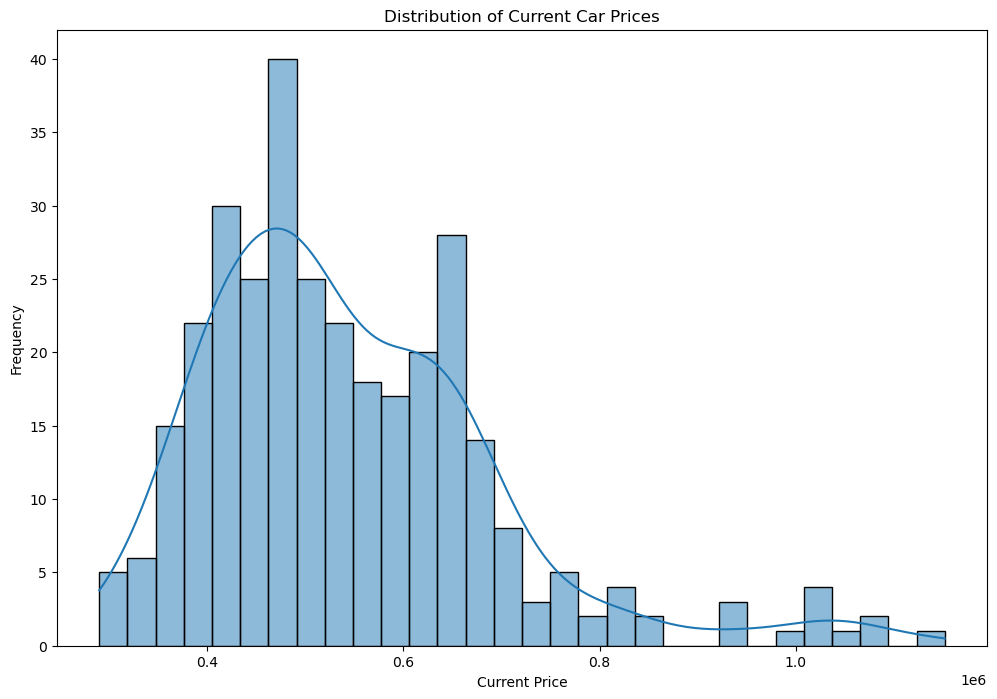

In [57]:
# Histogram for current car price distribution
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Current Price', bins=30, kde=True)
plt.title('Distribution of Current Car Prices')
plt.ylabel('Frequency')
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


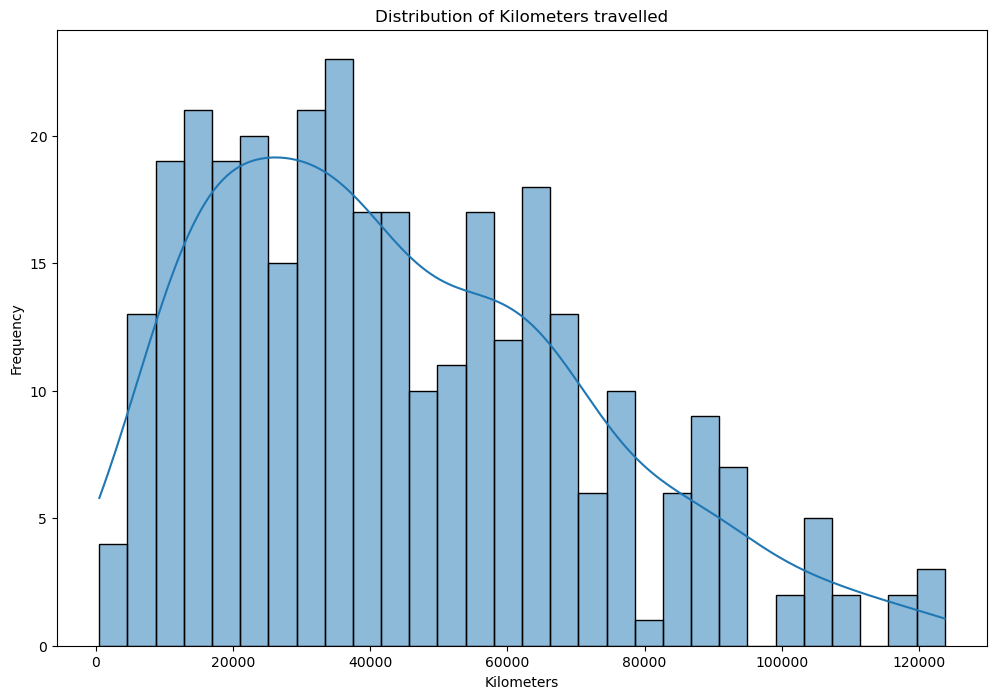

In [58]:
# Histogram for Kilometers distribution
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Kilometers', bins=30, kde=True)
plt.title('Distribution of Kilometers travelled')
plt.ylabel('Frequency')
plt.show()

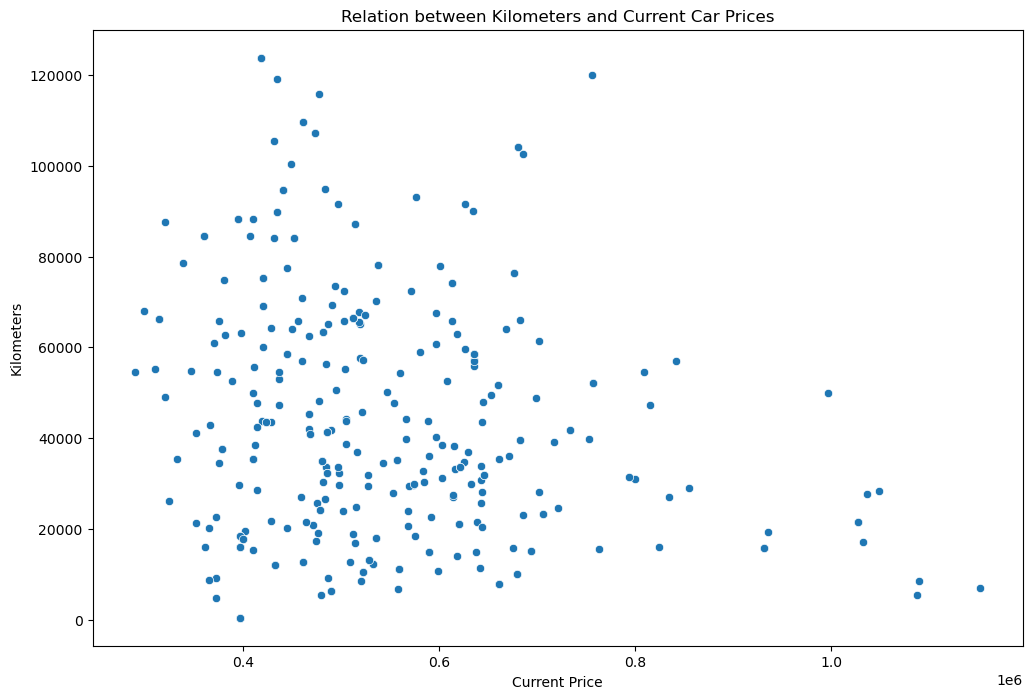

In [59]:
# Relationship between kilometers driven and current price using scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Current Price', y='Kilometers')
plt.title('Relation between Kilometers and Current Car Prices')
#plt.ylabel('Frequency')
plt.show()

In [60]:
corcoef = np.corrcoef(df['Kilometers'],df['Current Price'])[0,1].round(3)

relation = []
if corcoef >= -0.3 and corcoef <= 0.3:
    relation.append('weak relation')
elif (corcoef >= -0.6 and corcoef < -0.3) or (corcoef > 0.3 and corcoef <= 0.6):
    relation.append('moderate relation')
else:
    relation.append('strong relation')
    
print(f'Since correlation coefficient between kilometers and current price is {corcoef}, there is {relation[0]}.')

Since correlation coefficient between kilometers and current price is -0.203, there is weak relation.


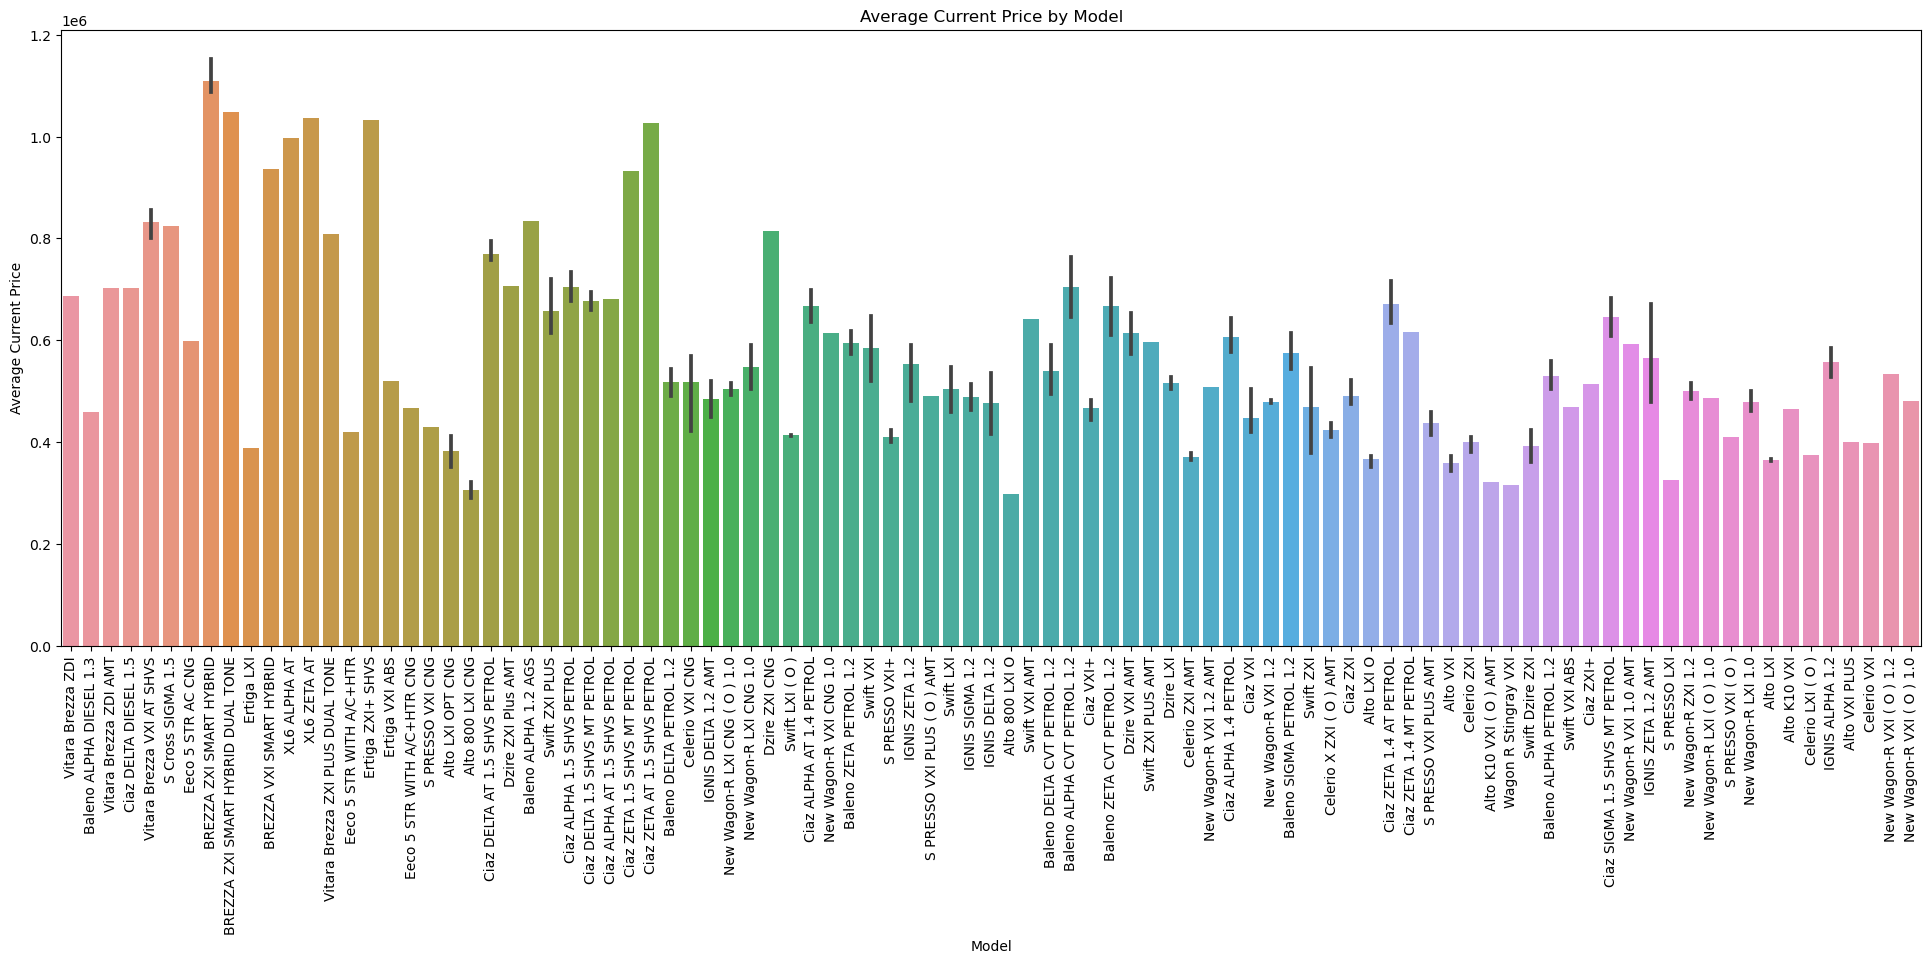

In [61]:
# Average current price by model:
plt.figure(figsize=(24, 8))
sns.barplot(x='Model', y='Current Price', data=df)
plt.title('Average Current Price by Model')
plt.xticks(rotation=90)
plt.ylabel('Average Current Price')
plt.show()

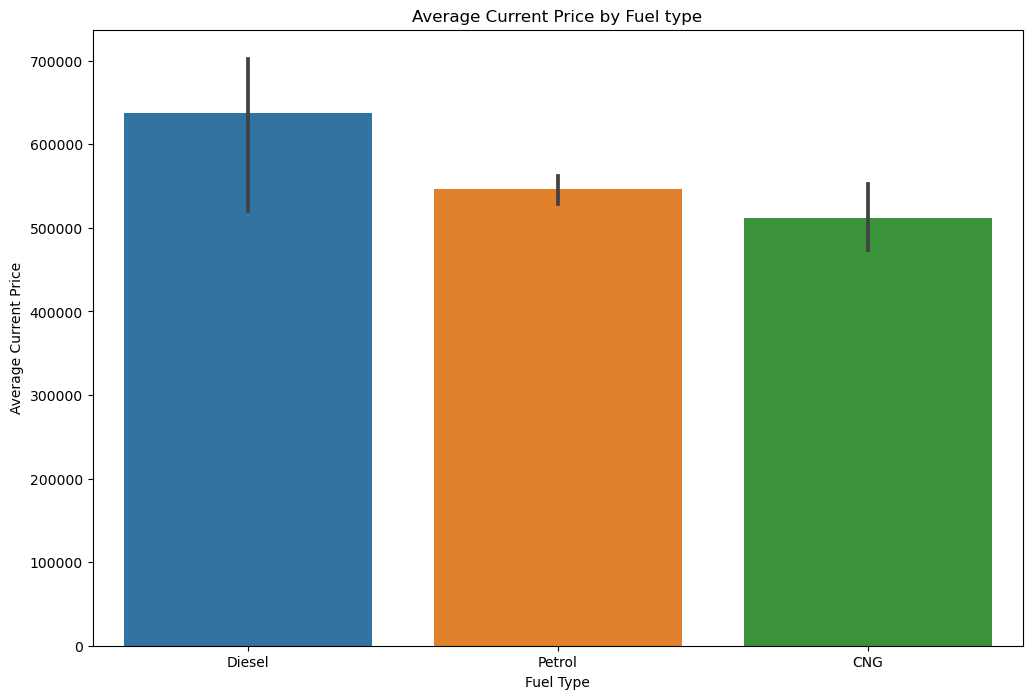

In [62]:
# Average current price by fuel type:
plt.figure(figsize=(12, 8))
sns.barplot(x='Fuel Type', y='Current Price', data=df)
plt.title('Average Current Price by Fuel type')
plt.ylabel('Average Current Price')
plt.show()

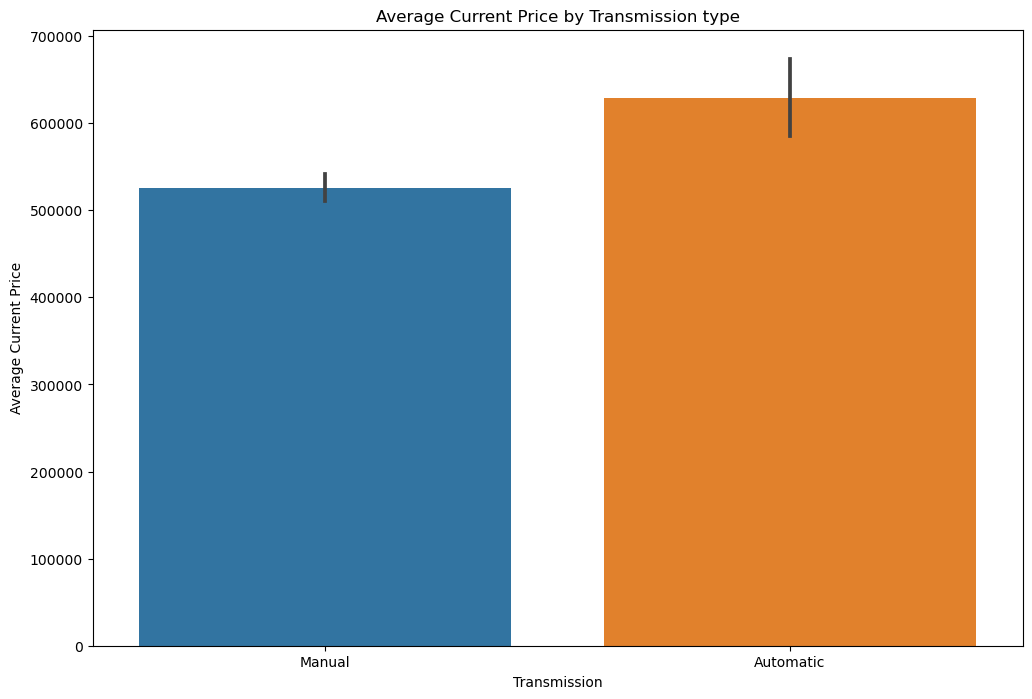

In [63]:
# Average current price by transmission type:
plt.figure(figsize=(12, 8))
sns.barplot(x='Transmission', y='Current Price', data=df)
plt.title('Average Current Price by Transmission type')
plt.ylabel('Average Current Price')
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


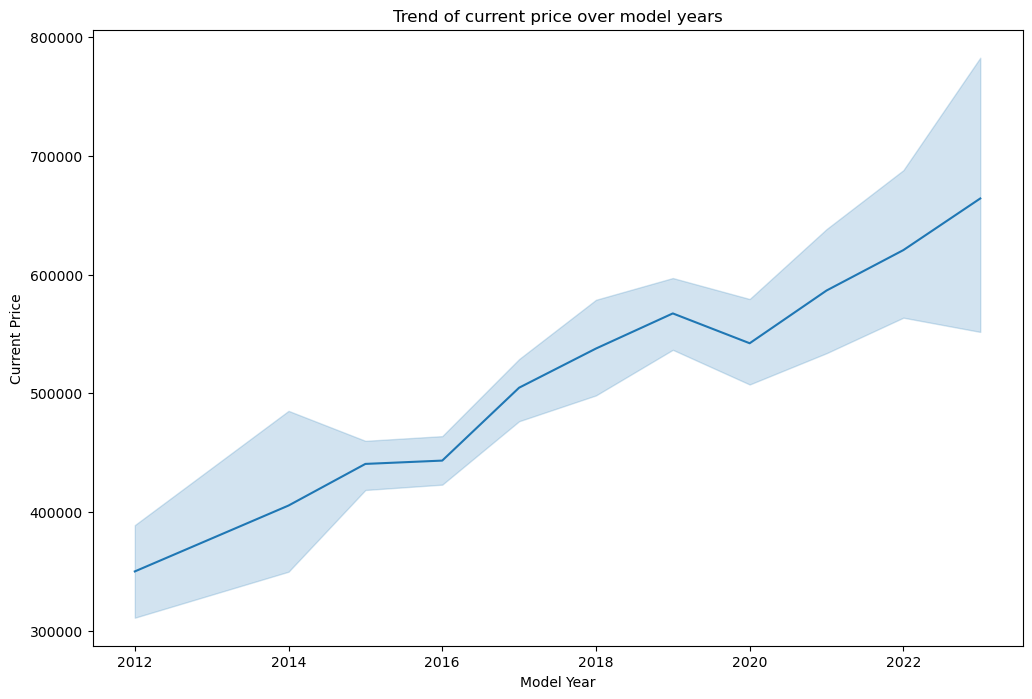

In [64]:
# Trend of current price over model years
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model Year', y='Current Price', data=df)
plt.title('Trend of current price over model years')
plt.show()

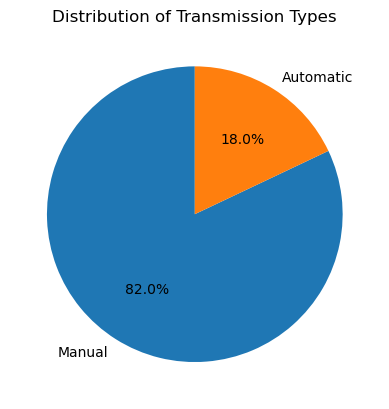

In [65]:
# Pie chart of Transmission types Automatic and Manual 
df['Transmission'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Transmission Types')
plt.ylabel('')
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


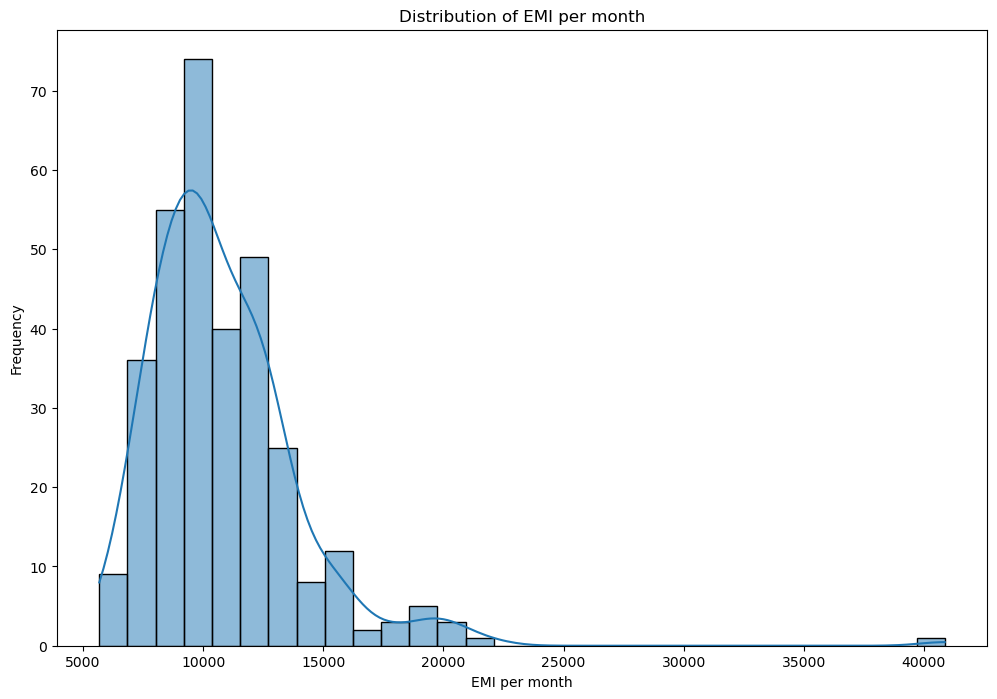

In [66]:
# Histogram for EMI per month distribution
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='EMI per month', bins=30, kde=True)
plt.title('Distribution of EMI per month')
plt.ylabel('Frequency')
plt.show()

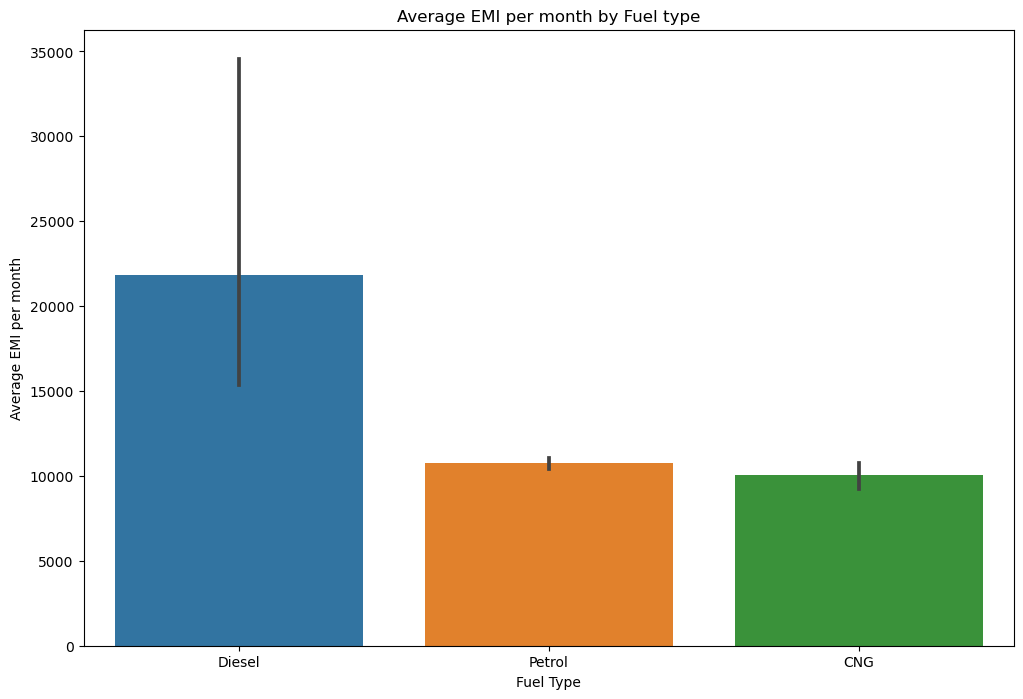

In [67]:
# Average EMI per month by fuel type:
plt.figure(figsize=(12, 8))
sns.barplot(x='Fuel Type', y='EMI per month', data=df)
plt.title('Average EMI per month by Fuel type')
plt.ylabel('Average EMI per month')
plt.show()

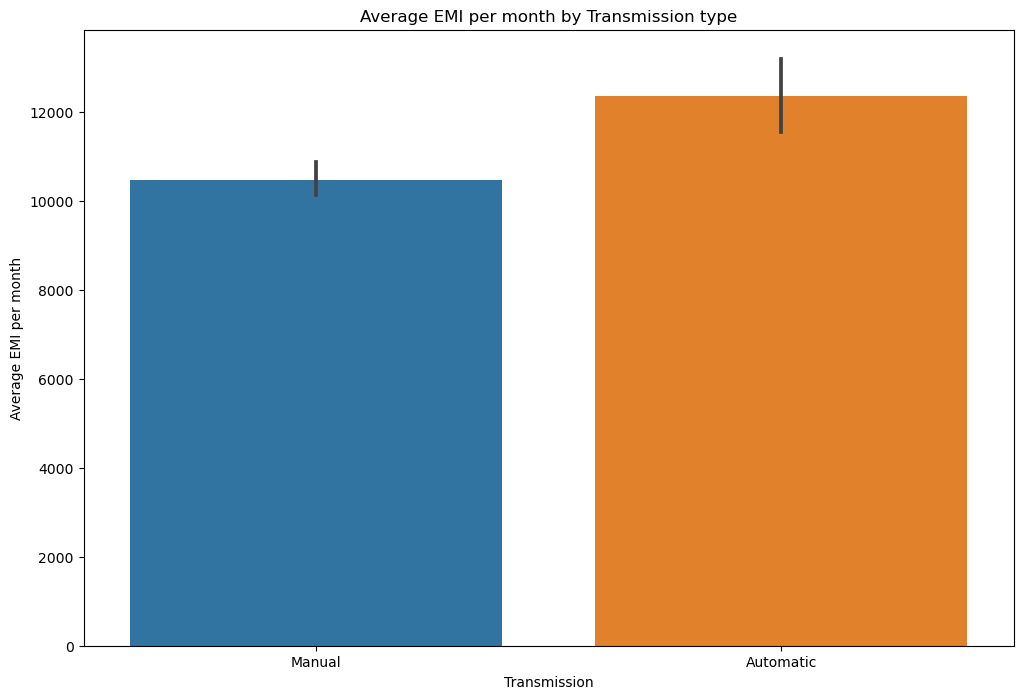

In [68]:
# Average EMI per month by transmission type:
plt.figure(figsize=(12, 8))
sns.barplot(x='Transmission', y='EMI per month', data=df)
plt.title('Average EMI per month by Transmission type')
plt.ylabel('Average EMI per month')
plt.show()